## Keypoint Extraction and Plot for One Frame

In [3]:
import json
import numpy as np
from pprint import pprint


with open('29909766_166363330604787_3520683554452754112_n_000000000123_keypoints.json') as f:
    data = json.load(f)
    if len(data['people']) != 0:
        keypoints_2d = data['people'][0]['pose_keypoints_2d']
        keypoints_2d = np.array(keypoints_2d)

print(keypoints_2d)

[0.00000e+00 0.00000e+00 0.00000e+00 3.02295e+02 5.26003e+01 8.98768e-01
 3.34719e+02 5.65325e+01 7.95361e-01 3.56378e+02 1.05653e+02 8.66176e-01
 3.64236e+02 1.44968e+02 8.46274e-01 2.69856e+02 5.06534e+01 8.16533e-01
 2.53143e+02 9.87961e+01 8.10858e-01 2.47233e+02 1.44991e+02 8.70168e-01
 2.94430e+02 1.46023e+02 6.48933e-01 3.12119e+02 1.46988e+02 5.95579e-01
 3.13121e+02 2.28577e+02 6.89734e-01 3.13129e+02 2.96424e+02 7.54617e-01
 2.73799e+02 1.45999e+02 5.66196e-01 2.69845e+02 2.17775e+02 7.65047e-01
 2.63926e+02 2.81679e+02 7.46287e-01 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 3.18984e+02 2.01529e+01 9.45844e-01
 2.88583e+02 1.81971e+01 8.36389e-01 2.61016e+02 2.79684e+02 3.28169e-01
 2.56091e+02 2.81666e+02 4.91166e-01 2.64003e+02 2.90509e+02 6.98354e-01
 3.25918e+02 2.91485e+02 6.78250e-01 3.26885e+02 2.94437e+02 7.48855e-01
 3.11150e+02 3.04283e+02 7.09148e-01]


In [5]:
import pandas as pd
ignore_confidence = np.delete(keypoints_2d, np.arange(2, keypoints_2d.size, 3))
ignore_confidence = ignore_confidence.tolist()
ignore_confidence_x = ignore_confidence[0::2]
#ignore_confidence_x = [x for x in ignore_confidence_x if x != 0.0]
ignore_confidence_y = ignore_confidence[1::2]
ignore_confidence_y = [y for y in ignore_confidence_y]
ignore_confidence_x

[0.0,
 302.295,
 334.719,
 356.378,
 364.236,
 269.856,
 253.143,
 247.233,
 294.43,
 312.119,
 313.121,
 313.129,
 273.799,
 269.845,
 263.926,
 0.0,
 0.0,
 318.984,
 288.583,
 261.016,
 256.091,
 264.003,
 325.918,
 326.885,
 311.15]

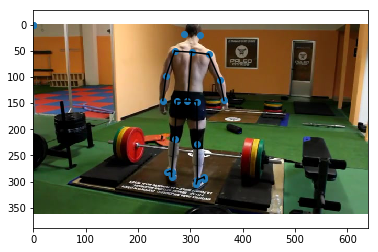

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os

cwd = os.getcwd() + "/"
IMAGE = cwd + "images/"
im = plt.imread(IMAGE + '0123.jpg')
implot = plt.imshow(im)

plt.plot(ignore_confidence_x,ignore_confidence_y, 'o')

def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    if (x1 == 0 and y1 == 0) or (x2 == 0 and y2 == 0):
        return
    plt.plot([x1,x2],[y1,y2],'k-')

pairs= [1,8,1,2,1,5,2,3,3,4,5,6,6,7,8,9,9,10,10,11,8,12,12,13,13,14,1,0,0,15,15,17,0,16,16,18,14,19,19,20,14,21,11,22,22,23,11,24
        ]
pairs_0 = pairs[0::2]
pairs_1 = pairs[1::2]
for i in np.arange(24):
    connectpoints(ignore_confidence_x,ignore_confidence_y,pairs_0[i],pairs_1[i])
plt.axis('equal')
plt.show()


## Plotting for Every Frame

In [5]:
"""
Import Statements and directory specifications
Pairs is adopted from Openpose Documentation, detailing which two joints should be connected when plotted
"""
import pandas as pd
import json
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import os
cwd = os.getcwd()
directory = os.fsencode(cwd)
IMAGE = cwd + "/" + "images/"
RESULT = cwd + "/" + "result/"
SMOOTHED_RESULT = cwd + "/" + "smoothed_result/"
pairs= [1,8,1,2,1,5,2,3,3,4,5,6,6,7,8,9,9,10,10,11,8,12,12,13,13,14,1,0,0,15,15,17,0,16,16,18,14,19,19,20,14,21,11,22,22,23,11,24
        ]

In [6]:
"""
Plots a line connecting point 
p1, p2 = integers specifying which joint; has a range 0-24
x, y = arrays of floats specifying corresponding xy-coordinate of each joint
e.g: xy-coordinate of joint 3
x_coor = x[3]
y_coor = y[3]
"""
def connectpoints(x,y,p1,p2):
    x1, x2 = x[p1], x[p2]
    y1, y2 = y[p1], y[p2]
    if (x1 == 0 and y1 == 0) or (x2 == 0 and y2 == 0):
        return
    plt.plot([x1,x2],[y1,y2],'k-')

In [7]:
def save_image(imagename, destination, plot, keypoints):
    if not plot:
        # im = plt.imread(IMAGE + imagename + ".jpg")
        # implot = plt.imshow(im)
#         plt.savefig(RESULT + imagename+ '.jpg', format = 'png', dpi = 1000)
#         plt.close()
        return
    else:
        ignore_confidence = np.delete(keypoints, np.arange(2, keypoints.size, 3))
        ignore_confidence = ignore_confidence.tolist()
        ignore_confidence_x = ignore_confidence[0::2]
        ignore_confidence_y = ignore_confidence[1::2]
        ignore_confidence_y = [-y for y in ignore_confidence_y]
        plt.plot(ignore_confidence_x,ignore_confidence_y, 'o')
        pairs_0 = pairs[0::2]
        pairs_1 = pairs[1::2]
        for i in np.arange(24):
            connectpoints(ignore_confidence_x,ignore_confidence_y,pairs_0[i],pairs_1[i])
        plt.axis('equal')
        #im = plt.imread(IMAGE + imagename + ".jpg")
        #implot = plt.imshow(im)
        plt.savefig(destination + imagename+ '.jpg', format = 'jpg', dpi = 1000)
        plt.close()

In [8]:
def save_image_smoothed(imagename, destination, keypoints):
    
    # grab json file of the unsmoothed image to see if anypoint is 0
    imageNum = int(imagename)-1
    original = image_to_2darray[imageNum]
    original_x = original[0::2]
    original_y = original[1::2]
    print(len(original_y))

    kx = keypoints[0::2]
    ky = keypoints[1::2]
    ky = [y for y in ky]
    
    for i in range(len(original_x)):
        if original_x[i] == 0:
            kx[i] = 0
        if original_y[i] == 0:
            ky[i] = 0
    
    plt.plot(kx, ky, 'o')
    pairs_0 = pairs[0::2]
    pairs_1 = pairs[1::2]
    for i in np.arange(24):
        connectpoints(kx,ky,pairs_0[i],pairs_1[i])
    plt.axis('equal')
    im = plt.imread(IMAGE + imagename + ".jpg")
    implot = plt.imshow(im)
    plt.savefig(destination + imagename+ '.png', format = 'png', dpi = 1000)
    plt.close()

In [9]:
for file in os.listdir(directory):
    filename = os.fsdecode(file)
#     print("filename is:" + filename)
    if filename.endswith(".json"):
        imageName = str(int(filename[:-15][-4:])+1)
#         print(imageName)
        if len(imageName) == 1:
            imageName = "000" + imageName
        elif len(imageName) == 2:
            imageName = "00" + imageName
        elif len(imageName) == 3:
            imageName = "0" + imageName
        with open(file) as f:
            data = json.load(f)
            if len(data['people']) != 0:
                keypoints_2d = data['people'][0]['pose_keypoints_2d']
                keypoints_2d = np.array(keypoints_2d)
                save_image(imageName, RESULT, True, keypoints_2d)
            else:
                # just display and print the image
                save_image(imageName, RESULT, False, None)
                
                


In [1]:
"""
Fill dict with original xy coordinates
"""
import scipy as scp
import os
import json
import numpy as np

dict = {}
for i in range(25):
    x = []
    y = []
    for j in range(1800):
        x.append(None)
        y.append(None)
    dict[i] = [x,y]

    
cwd = os.getcwd()
directory = os.fsencode(cwd)


# image name mapped to original 2d keypoints array
image_to_2darray = {}

count_file = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".json"):
        imageNum = int(filename[:-15][-4:])
        with open(file) as f:
            data = json.load(f)
            if len(data['people']) != 0:
                count_file += 1
                keypoints_2d = data['people'][0]['pose_keypoints_2d']
                keypoints_2d = np.array(keypoints_2d)
                ignore_confidence = np.delete(keypoints_2d, np.arange(2, keypoints_2d.size, 3))
                image_to_2darray[imageNum] = ignore_confidence # adding original array corresponding to imageNum
                it = iter(ignore_confidence)
                counter = 0
                for x in it:
                    dict[counter][0][imageNum] = x
                    dict[counter][1][imageNum] = next(it)
                    counter +=1
            else:
                dummy = []
                for i in range(50):
                    dummy.append(None)
                print(imageNum)
                print(len(dummy))
                image_to_2darray[imageNum] = dummy
                
len(dict[24][1])
print("image_to_2darray length: " + str(len(image_to_2darray)))

1769
50
1695
50
38
50
1718
50
1783
50
1796
50
1710
50
1705
50
25
50
30
50
1688
50
1774
50
1761
50
1791
50
1784
50
1687
50
1692
50
37
50
22
50
1702
50
1717
50
1799
50
1766
50
1773
50
1798
50
1716
50
1703
50
23
50
36
50
1772
50
1767
50
1693
50
1785
50
1790
50
1689
50
31
50
24
50
1704
50
1711
50
40
50
1760
50
1775
50
1768
50
1797
50
1782
50
1719
50
39
50
1694
50
1762
50
1777
50
1788
50
1706
50
1713
50
33
50
26
50
1696
50
1795
50
1780
50
45
50
1770
50
1765
50
21
50
34
50
1699
50
1714
50
1701
50
1787
50
1792
50
1709
50
1691
50
29
50
1778
50
28
50
1690
50
1708
50
1793
50
1786
50
1779
50
1764
50
1771
50
1700
50
1715
50
1698
50
35
50
20
50
1781
50
1794
50
1697
50
1776
50
1763
50
27
50
32
50
1712
50
1707
50
1789
50
1742
50
1757
50
13
50
6
50
1726
50
1733
50
9
50
1729
50
1758
50
1750
50
1745
50
1734
50
1721
50
1
50
14
50
1744
50
1751
50
15
50
0
50
1720
50
1735
50
1728
50
8
50
1759
50
1756
50
1743
50
1732
50
1727
50
7
50
12
50
5
50
10
50
1730
50
1725
50
1754
50
1741
50
1749
50
1738
50
18
50
1722


In [2]:
print(image_to_2darray[1769])

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [3]:
count_file

1645

In [4]:
"""
Sanity Check, there are 1800 json files
"""
num = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".json"):
        num += 1
num

1800

In [5]:
"""
Sanity Check, should be 1800 because there are 1800 jsons
Each json contains a pair of xy coord for each of the 25 keypoints
"""
print(len(dict[8][0]))
print(len(dict[24][1]))

1800
1800


In [6]:
"""
OLD VERSION, DON'T RUN
Create dictionary to store smoothed keypoints.
"""
from scipy.interpolate import interp1d

smoothed = {}
for i in range(25):
    smoothed[i] = [[],[]]
    
from scipy import signal
for i in range(25):
    # interpolate data first
    df = pd.DataFrame({'X': dict[i][0],'Y': dict[i][1]})
    int_X = df.interpolate().X.tolist()
    int_Y = df.interpolate().Y.tolist()
    x = signal.savgol_filter(int_X, 9, 7)
    y = signal.savgol_filter(int_Y, 9, 7)
    smoothed[i][0] = x
    smoothed[i][1] = y
#     x = signal.savgol_filter(dict[i][0],9,8)
#     y = signal.savgol_filter(dict[i][1],9,8)
#     smoothed[i][0] = x
#     smoothed[i][1] = y

smoothed

NameError: name 'pd' is not defined

In [18]:
"""
New Method, probably more reliable
Create dictionary to store smoothed keypoints.
"""
smoothed = {}
for i in range(1800):
    smoothed[i] = []

"""dict[i][0] = x-coordinate of keypoint i over the duration of the video
dict[i][1] = y-coordinate of keypoint i over the duration of the video
int_X interpolated = x-coordinates with NaN values filled
int_Y interpolated = y-coordinates with NaN values filled
x = filtered
y = filtered
zipped = x y pairs 
"""

from scipy import signal
for i in range(25):
    df = pd.DataFrame({'X': dict[i][0],'Y': dict[i][1]})
    int_X = df.interpolate().X.tolist()
    int_Y = df.interpolate().Y.tolist()
    x = signal.savgol_filter(int_X, 9, 4)
    y = signal.savgol_filter(int_Y, 9, 4)
    zipped = zip(x, y)
    counter = 0
    for pair in zipped:
        smoothed[counter].append(pair[0])
        smoothed[counter].append(pair[1])
        counter += 1
        print("counter:" + str(counter))
        print("pair:" + str(pair))


/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:1
pair:(nan, nan)
counter:2
pair:(nan, nan)
counter:3
pair:(nan, nan)
counter:4
pair:(nan, nan)
counter:5
pair:(nan, nan)
counter:6
pair:(nan, nan)
counter:7
pair:(nan, nan)
counter:8
pair:(nan, nan)
counter:9
pair:(nan, nan)
counter:10
pair:(nan, nan)
counter:11
pair:(nan, nan)
counter:12
pair:(nan, nan)
counter:13
pair:(nan, nan)
counter:14
pair:(nan, nan)
counter:15
pair:(nan, nan)
counter:16
pair:(nan, nan)
counter:17
pair:(nan, nan)
counter:18
pair:(nan, nan)
counter:19
pair:(nan, nan)
counter:20
pair:(nan, nan)
counter:21
pair:(nan, nan)
counter:22
pair:(nan, nan)
counter:23
pair:(nan, nan)
counter:24
pair:(nan, nan)
counter:25
pair:(nan, nan)
counter:26
pair:(nan, nan)
counter:27
pair:(nan, nan)
counter:28
pair:(nan, nan)
counter:29
pair:(nan, nan)
counter:30
pair:(nan, nan)
counter:31
pair:(nan, nan)
counter:32
pair:(nan, nan)
counter:33
pair:(nan, nan)
counter:34
pair:(nan, nan)
counter:35
pair:(nan, nan)
counter:36
pair:(nan, nan)
counter:37
pair:(nan, nan)
counter:38

counter:610
pair:(0.0, 0.0)
counter:611
pair:(0.0, 0.0)
counter:612
pair:(0.0, 0.0)
counter:613
pair:(0.0, 0.0)
counter:614
pair:(0.0, 0.0)
counter:615
pair:(0.0, 0.0)
counter:616
pair:(0.0, 0.0)
counter:617
pair:(0.0, 0.0)
counter:618
pair:(0.0, 0.0)
counter:619
pair:(0.0, 0.0)
counter:620
pair:(0.0, 0.0)
counter:621
pair:(0.0, 0.0)
counter:622
pair:(0.0, 0.0)
counter:623
pair:(0.0, 0.0)
counter:624
pair:(0.0, 0.0)
counter:625
pair:(0.0, 0.0)
counter:626
pair:(0.0, 0.0)
counter:627
pair:(0.0, 0.0)
counter:628
pair:(0.0, 0.0)
counter:629
pair:(0.0, 0.0)
counter:630
pair:(0.0, 0.0)
counter:631
pair:(0.0, 0.0)
counter:632
pair:(0.0, 0.0)
counter:633
pair:(0.0, 0.0)
counter:634
pair:(0.0, 0.0)
counter:635
pair:(0.0, 0.0)
counter:636
pair:(0.0, 0.0)
counter:637
pair:(0.0, 0.0)
counter:638
pair:(0.0, 0.0)
counter:639
pair:(0.0, 0.0)
counter:640
pair:(0.0, 0.0)
counter:641
pair:(0.0, 0.0)
counter:642
pair:(0.0, 0.0)
counter:643
pair:(0.0, 0.0)
counter:644
pair:(0.0, 0.0)
counter:645
pair:(0.

pair:(0.0, 0.0)
counter:1110
pair:(0.0, 0.0)
counter:1111
pair:(0.0, 0.0)
counter:1112
pair:(0.0, 0.0)
counter:1113
pair:(0.0, 0.0)
counter:1114
pair:(0.0, 0.0)
counter:1115
pair:(0.0, 0.0)
counter:1116
pair:(0.0, 0.0)
counter:1117
pair:(0.0, 0.0)
counter:1118
pair:(0.0, 0.0)
counter:1119
pair:(0.0, 0.0)
counter:1120
pair:(0.0, 0.0)
counter:1121
pair:(0.0, 0.0)
counter:1122
pair:(0.0, 0.0)
counter:1123
pair:(0.0, 0.0)
counter:1124
pair:(0.0, 0.0)
counter:1125
pair:(0.0, 0.0)
counter:1126
pair:(0.0, 0.0)
counter:1127
pair:(0.0, 0.0)
counter:1128
pair:(0.0, 0.0)
counter:1129
pair:(0.0, 0.0)
counter:1130
pair:(0.0, 0.0)
counter:1131
pair:(0.0, 0.0)
counter:1132
pair:(0.0, 0.0)
counter:1133
pair:(0.0, 0.0)
counter:1134
pair:(0.0, 0.0)
counter:1135
pair:(0.0, 0.0)
counter:1136
pair:(0.0, 0.0)
counter:1137
pair:(0.0, 0.0)
counter:1138
pair:(0.0, 0.0)
counter:1139
pair:(0.0, 0.0)
counter:1140
pair:(0.0, 0.0)
counter:1141
pair:(0.0, 0.0)
counter:1142
pair:(0.0, 0.0)
counter:1143
pair:(0.0, 0.0

pair:(0.0, 0.0)
counter:1610
pair:(0.0, 0.0)
counter:1611
pair:(0.0, 0.0)
counter:1612
pair:(0.0, 0.0)
counter:1613
pair:(0.0, 0.0)
counter:1614
pair:(0.0, 0.0)
counter:1615
pair:(0.0, 0.0)
counter:1616
pair:(0.0, 0.0)
counter:1617
pair:(0.0, 0.0)
counter:1618
pair:(0.0, 0.0)
counter:1619
pair:(0.0, 0.0)
counter:1620
pair:(0.0, 0.0)
counter:1621
pair:(0.0, 0.0)
counter:1622
pair:(0.0, 0.0)
counter:1623
pair:(0.0, 0.0)
counter:1624
pair:(0.0, 0.0)
counter:1625
pair:(0.0, 0.0)
counter:1626
pair:(0.0, 0.0)
counter:1627
pair:(0.0, 0.0)
counter:1628
pair:(0.0, 0.0)
counter:1629
pair:(9.77912587412611, 0.6718636363636526)
counter:1630
pair:(-26.077668997669903, -1.791758741258803)
counter:1631
pair:(-6.552214452214713, -0.4472016317016494)
counter:1632
pair:(81.50979020979275, 5.7336841491843265)
counter:1633
pair:(198.2627785547848, 13.2528477855482)
counter:1634
pair:(286.2742587412678, 19.54011585081647)
counter:1635
pair:(304.7802447552544, 22.233458741259444)
counter:1636
pair:(266.2807

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


pair:(165.02447086247605, 82.34992494172752)
counter:59
pair:(171.06967832168368, 84.6016298368325)
counter:60
pair:(175.56950349650901, 87.30471212121486)
counter:61
pair:(180.27736130536695, 89.25767855478136)
counter:62
pair:(184.29781118881698, 91.37700699300986)
counter:63
pair:(190.85148951049547, 91.65891118881407)
counter:64
pair:(197.9544638694701, 91.81388927739216)
counter:65
pair:(203.6683170163234, 89.8570547785576)
counter:66
pair:(208.4627855477921, 87.29713216783492)
counter:67
pair:(213.46940326341, 84.34798927739193)
counter:68
pair:(218.72969463870152, 81.69682167832424)
counter:69
pair:(222.5352657342727, 78.00838275058521)
counter:70
pair:(224.34072960373663, 75.99686456876697)
counter:71
pair:(226.83415384616097, 74.96655081585317)
counter:72
pair:(229.72869696970417, 74.81617855478089)
counter:73
pair:(232.95570396271128, 74.33951118881353)
counter:74
pair:(235.12737762238498, 73.48329277389507)
counter:75
pair:(236.16043123543866, 73.25639836830067)
counter:76
p

counter:308
pair:(293.7417412587505, 59.52793216783403)
counter:309
pair:(293.4421118881211, 59.52574265734452)
counter:310
pair:(293.36931468532384, 59.524788111889976)
counter:311
pair:(293.48332167833087, 59.5272023310042)
counter:312
pair:(293.4544522144614, 59.52960769230956)
counter:313
pair:(293.4591188811281, 59.53158997669185)
counter:314
pair:(293.4602587412679, 59.53335268065455)
counter:315
pair:(293.45379254080177, 59.52727529137716)
counter:316
pair:(293.44849883450803, 59.51751958042145)
counter:317
pair:(293.44987412588335, 59.501849883451754)
counter:318
pair:(293.45308158509084, 59.48975920746108)
counter:319
pair:(293.4908135198227, 59.48186829837016)
counter:320
pair:(293.3460023310115, 59.47509557109743)
counter:321
pair:(293.52950116551034, 59.46772191142378)
counter:322
pair:(293.75523076924003, 59.4635319347338)
counter:323
pair:(293.8551282051375, 59.45976130536317)
counter:324
pair:(293.7587902097994, 59.46025827506014)
counter:325
pair:(293.5296013986106, 59.

pair:(304.6221188811285, 139.09131468531905)
counter:577
pair:(307.50164335665306, 140.7912470862515)
counter:578
pair:(309.7467715617813, 141.89044522144968)
counter:579
pair:(309.61925641026613, 141.8736806526851)
counter:580
pair:(310.10447086248064, 142.3162890442935)
counter:581
pair:(311.08771328672304, 143.20647319347768)
counter:582
pair:(311.7787132867231, 144.12490675991128)
counter:583
pair:(311.8579557109655, 143.92439160839612)
counter:584
pair:(311.56456177157156, 142.81727039627486)
counter:585
pair:(311.43828671329646, 141.6042820512865)
counter:586
pair:(311.11997668998646, 140.38840093240535)
counter:587
pair:(310.7982237762335, 139.98910722611163)
counter:588
pair:(310.764051282061, 140.03840326340767)
counter:589
pair:(310.63941025642, 139.6326386946431)
counter:590
pair:(310.39303962704935, 139.0248065268109)
counter:591
pair:(299.15657109558055, 133.68066899767325)
counter:592
pair:(348.1627855477965, 155.67550582751073)
counter:593
pair:(290.46828438229346, 129.7

pair:(272.1769067599153, 66.37602424242633)
counter:1058
pair:(271.8448041958127, 66.31246993007201)
counter:1059
pair:(271.7742470862556, 66.33304195804403)
counter:1060
pair:(271.8841165501251, 66.33006410256618)
counter:1061
pair:(271.8505221445307, 66.33281538461745)
counter:1062
pair:(271.84973892774747, 66.33325664335872)
counter:1063
pair:(271.8485757575843, 66.33624685314894)
counter:1064
pair:(271.8824335664421, 66.33796107226316)
counter:1065
pair:(271.7666689976775, 66.30440163170371)
counter:1066
pair:(271.93804895105745, 66.36052307692516)
counter:1067
pair:(271.8329347319433, 66.54256363636573)
counter:1068
pair:(272.693284382293, 66.10096247086454)
counter:1069
pair:(273.35435664336524, 65.02370839161043)
counter:1070
pair:(274.63844289045153, 64.1859195804216)
counter:1071
pair:(276.21291142192007, 63.33969393939593)
counter:1072
pair:(277.6084871794959, 62.426696037297994)
counter:1073
pair:(278.96124242425117, 62.257110023311974)
counter:1074
pair:(280.18443123544, 62

pair:(292.27408158509076, 105.38141491841823)
counter:1308
pair:(293.23316783217706, 114.986101398605)
counter:1309
pair:(293.70040093241016, 125.8469918414958)
counter:1310
pair:(292.1836433566525, 130.88025874126285)
counter:1311
pair:(293.4670093240186, 136.42783449883876)
counter:1312
pair:(296.46836363637294, 141.47894638695084)
counter:1313
pair:(297.7519580419674, 146.1903473193519)
counter:1314
pair:(296.2703310023403, 149.4885734265781)
counter:1315
pair:(292.81418648019564, 148.70074125874592)
counter:1316
pair:(292.3125011655103, 146.83454312354775)
counter:1317
pair:(295.54337762238686, 147.649291375296)
counter:1318
pair:(297.2365221445314, 146.54541724942183)
counter:1319
pair:(297.88183916084853, 146.00945454545914)
counter:1320
pair:(298.58442191143126, 145.66922144522601)
counter:1321
pair:(298.80557342658284, 144.19465501165953)
counter:1322
pair:(299.1524032634127, 141.70728438228883)
counter:1323
pair:(297.6498601398695, 139.02926806527242)
counter:1324
pair:(296.54

counter:1557
pair:(278.3944638694726, 59.20250932401119)
counter:1558
pair:(279.0337785547873, 58.75599347319532)
counter:1559
pair:(279.43200466201347, 58.45256853147036)
counter:1560
pair:(279.6047948718036, 58.38547086247269)
counter:1561
pair:(279.961466200475, 58.919404428906276)
counter:1562
pair:(280.6329603729692, 59.216021911423766)
counter:1563
pair:(281.6864708624797, 59.22308414918601)
counter:1564
pair:(282.464487179496, 58.89559300699485)
counter:1565
pair:(282.68759906760795, 58.47738927739111)
counter:1566
pair:(282.78131934732824, 58.425861072262904)
counter:1567
pair:(282.61810256411144, 58.49473006993191)
counter:1568
pair:(282.37911655012545, 58.50699254079438)
counter:1569
pair:(281.8173706293795, 58.58304498834683)
counter:1570
pair:(281.7114615384704, 58.51568554778739)
counter:1571
pair:(281.89067832168723, 57.25513193473374)
counter:1572
pair:(282.12820979021865, 55.28847062937236)
counter:1573
pair:(281.9247715617804, 53.42636853147022)
counter:1574
pair:(281.

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



pair:(nan, nan)
counter:7
pair:(nan, nan)
counter:8
pair:(nan, nan)
counter:9
pair:(nan, nan)
counter:10
pair:(nan, nan)
counter:11
pair:(nan, nan)
counter:12
pair:(nan, nan)
counter:13
pair:(nan, nan)
counter:14
pair:(nan, nan)
counter:15
pair:(nan, nan)
counter:16
pair:(nan, nan)
counter:17
pair:(nan, nan)
counter:18
pair:(nan, nan)
counter:19
pair:(nan, nan)
counter:20
pair:(nan, nan)
counter:21
pair:(nan, nan)
counter:22
pair:(nan, nan)
counter:23
pair:(nan, nan)
counter:24
pair:(nan, nan)
counter:25
pair:(nan, nan)
counter:26
pair:(nan, nan)
counter:27
pair:(nan, nan)
counter:28
pair:(nan, nan)
counter:29
pair:(nan, nan)
counter:30
pair:(nan, nan)
counter:31
pair:(nan, nan)
counter:32
pair:(nan, nan)
counter:33
pair:(nan, nan)
counter:34
pair:(nan, nan)
counter:35
pair:(nan, nan)
counter:36
pair:(nan, nan)
counter:37
pair:(nan, nan)
counter:38
pair:(nan, nan)
counter:39
pair:(nan, nan)
counter:40
pair:(nan, nan)
counter:41
pair:(nan, nan)
counter:42
pair:(nan, nan)
counter:43
pai

counter:256
pair:(321.7473986014087, 58.24497226107408)
counter:257
pair:(321.2041305361406, 58.03551282051464)
counter:258
pair:(320.7177202797303, 58.164327972029795)
counter:259
pair:(320.2191958042058, 58.39295501165685)
counter:260
pair:(320.03640792541796, 58.57861165501349)
counter:261
pair:(319.921731934742, 58.43192540792724)
counter:262
pair:(319.9941724941825, 58.46727668997853)
counter:263
pair:(320.1016386946487, 58.47263403263587)
counter:264
pair:(319.91703729604734, 58.47941118881302)
counter:265
pair:(319.6957995338096, 58.49330769230952)
counter:266
pair:(319.57107925408934, 58.50442913753097)
counter:267
pair:(319.78166899767905, 58.515527972029815)
counter:268
pair:(319.94173193474194, 58.52496410256593)
counter:269
pair:(319.8329114219215, 58.52928531468715)
counter:270
pair:(319.2977599067699, 58.56484405594588)
counter:271
pair:(319.041696969707, 58.4550025641044)
counter:272
pair:(318.9784009324109, 58.48844219114403)
counter:273
pair:(319.09712587413594, 58.920

pair:(309.85669463870437, 64.5899722610743)
counter:506
pair:(310.5015710955808, 63.78672727272928)
counter:507
pair:(310.9021188811287, 62.42768857809054)
counter:508
pair:(311.1436480186577, 61.41299953380146)
counter:509
pair:(311.32111888112865, 60.451724475526376)
counter:510
pair:(311.87601631702614, 59.72127459207647)
counter:511
pair:(313.6813379953478, 60.202911655013544)
counter:512
pair:(315.89724941725933, 60.67006876457067)
counter:513
pair:(317.6046736596836, 61.66387482517676)
counter:514
pair:(318.20662937063935, 62.792632867134834)
counter:515
pair:(318.08212820513813, 64.35111515151718)
counter:516
pair:(318.2982331002431, 68.06777272727487)
counter:517
pair:(318.6672727272827, 71.75223216783442)
counter:518
pair:(319.0265524475625, 74.81313100233334)
counter:519
pair:(319.55337062938065, 78.11410745920992)
counter:520
pair:(319.6335687645788, 82.98843986014245)
counter:521
pair:(319.72908391609394, 93.05970629370921)
counter:522
pair:(319.70285314686316, 102.79650466

pair:(304.3154428904524, 135.40511188811615)
counter:756
pair:(303.0025734265829, 134.49248717949138)
counter:757
pair:(302.29210955711903, 133.7513240093282)
counter:758
pair:(302.0600792540887, 133.48626340326757)
counter:759
pair:(301.50503729604674, 132.68652680653094)
counter:760
pair:(301.61421678322625, 132.42137995338413)
counter:761
pair:(301.9033170163265, 131.61872494172906)
counter:762
pair:(302.3195151515247, 131.3943962704004)
counter:763
pair:(302.39383916084864, 131.8087109557151)
counter:764
pair:(302.1698741258836, 133.07652680653098)
counter:765
pair:(302.2845058275153, 134.5799976690019)
counter:766
pair:(302.59156643357596, 135.68055477855904)
counter:767
pair:(302.98520046620996, 136.2787995338038)
counter:768
pair:(303.31839393940345, 136.80227972028405)
counter:769
pair:(303.24896270397215, 137.24131468531897)
counter:770
pair:(303.3240909091004, 137.19613286713718)
counter:771
pair:(303.59815850816807, 137.12970396270828)
counter:772
pair:(303.7359463869559, 13

counter:1005
pair:(316.7373729603829, 136.0559114219157)
counter:1006
pair:(316.98369230770226, 136.18288578089005)
counter:1007
pair:(317.17845920746913, 136.14969230769657)
counter:1008
pair:(317.04866899767893, 136.14395804196232)
counter:1009
pair:(316.958958041968, 136.1050093240136)
counter:1010
pair:(317.02820279721277, 136.22318181818608)
counter:1011
pair:(317.29294871795867, 136.0888461538504)
counter:1012
pair:(317.8035151515251, 135.9664685314728)
counter:1013
pair:(318.03094638695643, 135.67668531468956)
counter:1014
pair:(317.79631468532466, 134.622582750587)
counter:1015
pair:(317.2816783216883, 133.13002097902518)
counter:1016
pair:(317.00940559441557, 131.832132867137)
counter:1017
pair:(316.9708764568864, 131.02273892774303)
counter:1018
pair:(316.97900466201463, 131.24919813520228)
counter:1019
pair:(317.02762937063926, 131.30874825175238)
counter:1020
pair:(317.26778088579084, 130.94951515151928)
counter:1021
pair:(317.8747412587512, 130.74370163170573)
counter:1022

counter:1505
pair:(307.99715384616354, 58.9683848484867)
counter:1506
pair:(307.6693636363733, 59.13220093240278)
counter:1507
pair:(306.64688811189774, 59.50124195804382)
counter:1508
pair:(305.4321375291471, 59.575775291377155)
counter:1509
pair:(304.6631328671424, 59.453128671330546)
counter:1510
pair:(304.11124708625664, 59.490549883451756)
counter:1511
pair:(303.97303496504446, 59.507481585083454)
counter:1512
pair:(303.65071095572046, 59.52421142191329)
counter:1513
pair:(303.1652983683079, 59.533217482519355)
counter:1514
pair:(303.2933659673755, 59.52935151515339)
counter:1515
pair:(303.6523286713382, 59.558292074593936)
counter:1516
pair:(303.7211235431331, 59.43928368298555)
counter:1517
pair:(303.6224941725037, 59.503300233102095)
counter:1518
pair:(303.3874172494268, 59.79458228438416)
counter:1519
pair:(303.19397202798154, 60.1823860139879)
counter:1520
pair:(303.3356083916179, 60.47387599067789)
counter:1521
pair:(303.29928671329617, 60.54499184149374)
counter:1522
pair:(

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:204
pair:(330.7100163170267, 98.6700184149215)
counter:205
pair:(331.11450582751627, 98.82169673659983)
counter:206
pair:(331.6944988345092, 99.05779254079565)
counter:207
pair:(332.5114988345093, 99.20501375291686)
counter:208
pair:(333.07896037297087, 99.38059254079566)
counter:209
pair:(333.5461911422016, 99.68062400932713)
counter:210
pair:(333.9839184149289, 99.76140093240406)
counter:211
pair:(334.4268088578194, 99.5671456876488)
counter:212
pair:(335.02013519814574, 99.08168997669308)
counter:213
pair:(335.726214452225, 99.1337013986045)
counter:214
pair:(336.323200466211, 99.28743379953693)
counter:215
pair:(337.2663473193579, 99.93425687646001)
counter:216
pair:(337.6088554778661, 100.09227738928053)
counter:217
pair:(337.10504428905483, 100.19391608391923)
counter:218
pair:(336.2064755244861, 100.35310792541108)
counter:219
pair:(334.9894009324114, 100.4619545454577)
counter:220
pair:(334.26240093241137, 100.94387412587729)
counter:221
pair:(334.03117715618765, 101.87

pair:(318.024986013996, 105.72006526806858)
counter:704
pair:(317.9804592074692, 105.63458741259072)
counter:705
pair:(318.35952214453215, 105.49007925408257)
counter:706
pair:(318.76109324010326, 105.02728671329001)
counter:707
pair:(318.84365967366966, 104.96337062937393)
counter:708
pair:(319.1834032634133, 106.82095804196139)
counter:709
pair:(320.52111188812194, 109.07562937063278)
counter:710
pair:(322.7185407925509, 112.72439860140214)
counter:711
pair:(324.39831934732956, 116.56440093240458)
counter:712
pair:(325.1590396270499, 119.34359207459582)
counter:713
pair:(325.26215151516175, 121.61300932401313)
counter:714
pair:(325.52232867133887, 125.67039860140254)
counter:715
pair:(325.90993240094264, 134.06595104895524)
counter:716
pair:(326.00501631702656, 143.62149417249867)
counter:717
pair:(325.9486433566536, 150.68982983683458)
counter:718
pair:(326.2864918415021, 157.6527762237812)
counter:719
pair:(324.69729370630387, 168.63186013986544)
counter:720
pair:(325.9923076923179

pair:(326.88394172495197, 189.18368065268658)
counter:1204
pair:(326.85320512821534, 188.94781818182412)
counter:1205
pair:(326.968244755255, 188.81125641026233)
counter:1206
pair:(326.93413519814544, 188.99383449884044)
counter:1207
pair:(326.93305594406615, 189.2884009324069)
counter:1208
pair:(326.9271235431338, 189.07109557110152)
counter:1209
pair:(326.92035431236457, 188.32912121212712)
counter:1210
pair:(326.90955710956734, 187.58486247086836)
counter:1211
pair:(326.8964685314788, 186.91022377622963)
counter:1212
pair:(326.88537529138557, 186.5546107226166)
counter:1213
pair:(326.87973426574456, 186.28845687646273)
counter:1214
pair:(326.8727995338098, 186.2855967366026)
counter:1215
pair:(326.8739720279823, 186.33755710956294)
counter:1216
pair:(326.8478881118983, 186.016480186486)
counter:1217
pair:(326.96287645688676, 185.6353892773951)
counter:1218
pair:(326.88728205129235, 185.29560606061187)
counter:1219
pair:(326.58879487180513, 185.32143123543705)
counter:1220
pair:(326.

counter:1703
pair:(0.0, 0.0)
counter:1704
pair:(0.0, 0.0)
counter:1705
pair:(0.0, 0.0)
counter:1706
pair:(0.0, 0.0)
counter:1707
pair:(0.0, 0.0)
counter:1708
pair:(0.0, 0.0)
counter:1709
pair:(0.0, 0.0)
counter:1710
pair:(0.0, 0.0)
counter:1711
pair:(0.0, 0.0)
counter:1712
pair:(0.0, 0.0)
counter:1713
pair:(0.0, 0.0)
counter:1714
pair:(0.0, 0.0)
counter:1715
pair:(0.0, 0.0)
counter:1716
pair:(0.0, 0.0)
counter:1717
pair:(0.0, 0.0)
counter:1718
pair:(0.0, 0.0)
counter:1719
pair:(0.0, 0.0)
counter:1720
pair:(0.0, 0.0)
counter:1721
pair:(0.0, 0.0)
counter:1722
pair:(0.0, 0.0)
counter:1723
pair:(0.0, 0.0)
counter:1724
pair:(0.0, 0.0)
counter:1725
pair:(0.0, 0.0)
counter:1726
pair:(0.0, 0.0)
counter:1727
pair:(0.0, 0.0)
counter:1728
pair:(0.0, 0.0)
counter:1729
pair:(0.0, 0.0)
counter:1730
pair:(0.0, 0.0)
counter:1731
pair:(0.0, 0.0)
counter:1732
pair:(0.0, 0.0)
counter:1733
pair:(0.0, 0.0)
counter:1734
pair:(0.0, 0.0)
counter:1735
pair:(0.0, 0.0)
counter:1736
pair:(0.0, 0.0)
counter:1737
p

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



pair:(341.65361072262147, 217.00090209790892)
counter:403
pair:(341.0675687645795, 220.3670979021048)
counter:404
pair:(340.37512121213183, 222.89675990676687)
counter:405
pair:(339.37014219115287, 225.23252680653385)
counter:406
pair:(337.8707995338101, 228.23682517483235)
counter:407
pair:(337.0020372960479, 231.31087412588138)
counter:408
pair:(336.6383729603835, 232.3500466200539)
counter:409
pair:(337.1150023310129, 232.22279953380684)
counter:410
pair:(337.74457109558165, 231.9709090909164)
counter:411
pair:(337.86815151516214, 231.4110955711028)
counter:412
pair:(337.7269627039733, 231.40103962704688)
counter:413
pair:(337.141834498845, 231.53349883450613)
counter:414
pair:(336.09336130537184, 231.5171818181891)
counter:415
pair:(336.32021445222495, 231.52531701632427)
counter:416
pair:(336.7212191142297, 231.53517715618443)
counter:417
pair:(337.14389510490565, 231.5828974359047)
counter:418
pair:(337.13050116551176, 231.4418671328744)
counter:419
pair:(336.55122843823904, 231

counter:902
pair:(324.5144475524577, 218.10369230769916)
counter:903
pair:(324.8673426573529, 219.36878787879476)
counter:904
pair:(324.8657062937165, 221.33342424243116)
counter:905
pair:(324.64399533800554, 222.23764335665032)
counter:906
pair:(324.0711934732036, 225.60210256410966)
counter:907
pair:(324.1747552447654, 228.82767365968084)
counter:908
pair:(324.81913519814543, 229.1481002331074)
counter:909
pair:(325.66020512821535, 227.39652913753625)
counter:910
pair:(326.0444102564205, 225.3357086247157)
counter:911
pair:(325.91722144523163, 224.33035198135903)
counter:912
pair:(325.78236130537147, 226.82769696970405)
counter:913
pair:(326.1859487179589, 227.91510489511205)
counter:914
pair:(326.8642983683086, 227.97563403264118)
counter:915
pair:(327.72590442891476, 227.34361538462252)
counter:916
pair:(327.8841724941828, 226.69135664336375)
counter:917
pair:(327.7221235431339, 227.52230769231483)
counter:918
pair:(327.4660582750686, 228.29639627040342)
counter:919
pair:(327.29675

pair:(367.2361282051397, 263.4248298368381)
counter:1402
pair:(314.50444055945053, 225.31802331003044)
counter:1403
pair:(325.9315221445324, 233.47748717949452)
counter:1404
pair:(325.81612354313376, 233.44461538462275)
counter:1405
pair:(325.84782284383306, 233.56311655012388)
counter:1406
pair:(325.8495291375394, 233.50050116550847)
counter:1407
pair:(325.8546363636466, 233.2075198135271)
counter:1408
pair:(314.4666433566533, 224.68419580420291)
counter:1409
pair:(356.2483310023423, 254.1980885780966)
counter:1410
pair:(333.46099300700354, 237.86795337996088)
counter:1411
pair:(230.91607226107953, 164.8099090909143)
counter:1412
pair:(94.94863636363932, 67.75502331002542)
counter:1413
pair:(-7.595757575757876, -5.420209790210002)
counter:1414
pair:(-30.383717948719, -21.681526806527554)
counter:1415
pair:(22.78776223776279, 16.26087412587452)
counter:1416
pair:(-30.383752913753963, -21.680804195804946)
counter:1417
pair:(-7.595384615384912, -5.42082750582772)
counter:1418
pair:(94.94

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



counter:101
pair:(218.78073426574113, 66.86007645687856)
counter:102
pair:(222.37871328672026, 67.68148275058488)
counter:103
pair:(226.76348251748962, 68.19584032634248)
counter:104
pair:(230.08325641026363, 68.27790862471076)
counter:105
pair:(232.44507226107953, 68.55464382284599)
counter:106
pair:(236.2079627039701, 67.60283263403475)
counter:107
pair:(241.28566666667425, 65.16767319347524)
counter:108
pair:(246.22926340327115, 62.321962937064896)
counter:109
pair:(249.4334638694717, 60.03946526806715)
counter:110
pair:(252.09069463870256, 58.74552237762422)
counter:111
pair:(255.07932400933203, 57.66198251748433)
counter:112
pair:(259.35787179487994, 55.29618904429078)
counter:113
pair:(262.6862470862553, 52.90906736596903)
counter:114
pair:(263.71720046620874, 51.81252470862633)
counter:115
pair:(264.2433100233183, 51.419299067600676)
counter:116
pair:(265.0453240093323, 51.348103496505104)
counter:117
pair:(267.18746853147695, 50.95555337995498)
counter:118
pair:(269.4350699300

pair:(212.0425827505895, 100.14357342657661)
counter:601
pair:(76.858053613056, 36.65242424242538)
counter:602
pair:(-30.856188811189924, -14.706177156177676)
counter:603
pair:(-30.701025641026735, -14.687937062937586)
counter:604
pair:(86.05910256410519, 41.4860023310036)
counter:605
pair:(187.04600000000588, 90.19217249417534)
counter:606
pair:(270.4224125874211, 130.40446153846565)
counter:607
pair:(289.2882727272819, 139.10883216783657)
counter:608
pair:(255.71801165501978, 122.57902331002718)
counter:609
pair:(265.13463170164005, 126.81547552447951)
counter:610
pair:(264.9778484848568, 126.95386713287111)
counter:611
pair:(264.60972027972855, 127.61682284382684)
counter:612
pair:(264.1866596736679, 128.14211655012056)
counter:613
pair:(254.80061538462343, 123.53342890443281)
counter:614
pair:(289.73178554779474, 139.55850815851255)
counter:615
pair:(281.5053729603818, 134.75434032634453)
counter:616
pair:(164.377407925413, 77.98475990676232)
counter:617
pair:(71.33905594405809, 34

counter:1100
pair:(270.8657529137614, 122.42335664336048)
counter:1101
pair:(270.82740559441413, 122.08498601398985)
counter:1102
pair:(271.6245477855563, 121.98135431235814)
counter:1103
pair:(272.4102237762323, 122.07781818182201)
counter:1104
pair:(273.1510279720365, 122.30201165501549)
counter:1105
pair:(273.04711421912276, 122.49062937063321)
counter:1106
pair:(272.6746340326426, 122.34670629371014)
counter:1107
pair:(272.2962657342743, 122.3922983683022)
counter:1108
pair:(272.39670163171013, 122.39879487179871)
counter:1109
pair:(272.91808624709483, 122.41109790210174)
counter:1110
pair:(273.3116573426659, 122.42127738928123)
counter:1111
pair:(272.82388344989204, 122.41772960373343)
counter:1112
pair:(272.414573426582, 122.40193006993391)
counter:1113
pair:(272.17027738928596, 122.38637995338378)
counter:1114
pair:(272.31478088578945, 122.3839673659712)
counter:1115
pair:(272.8695990676076, 122.4002074592113)
counter:1116
pair:(273.01962703963557, 122.47094638695023)
counter:11

counter:1600
pair:(237.96879720280467, 58.6526130536149)
counter:1601
pair:(235.05545920746658, 58.83635081585267)
counter:1602
pair:(232.5113613053686, 59.144719813521675)
counter:1603
pair:(231.42144289045015, 59.40337249417436)
counter:1604
pair:(231.5370955711028, 59.01207878788064)
counter:1605
pair:(231.51594871795595, 58.59392214452398)
counter:1606
pair:(231.2635454545527, 58.03576736596918)
counter:1607
pair:(230.83226806527531, 58.088149883451706)
counter:1608
pair:(230.56290675991397, 58.43324335664519)
counter:1609
pair:(230.37424475525196, 58.62377459207643)
counter:1610
pair:(230.55737995338717, 58.36561561771745)
counter:1611
pair:(230.85830069930793, 58.48791095571279)
counter:1612
pair:(231.18391608392335, 58.79325874126059)
counter:1613
pair:(231.6027016317089, 59.156781818183674)
counter:1614
pair:(231.48275990676717, 59.577510023311895)
counter:1615
pair:(232.17148484849213, 59.57443356643543)
counter:1616
pair:(234.70925407926146, 59.142712587414444)
counter:1617
p

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:299
pair:(263.94361305362133, 105.70924242424576)
counter:300
pair:(263.94267365968193, 105.75133100233433)
counter:301
pair:(263.9401025641108, 105.60628438228771)
counter:302
pair:(263.9398438228521, 105.81847086247419)
counter:303
pair:(263.9093939394022, 105.92444755245087)
counter:304
pair:(264.02031934732764, 106.08176223776557)
counter:305
pair:(263.95224475525305, 106.27802564102896)
counter:306
pair:(263.6635874125957, 106.4348997669031)
counter:307
pair:(263.27925407926233, 106.51570163170499)
counter:308
pair:(262.9878018648101, 106.85068531468868)
counter:309
pair:(262.91238927739755, 106.6381258741292)
counter:310
pair:(263.0168508158591, 106.37486480186814)
counter:311
pair:(262.9797715617798, 105.99341491841825)
counter:312
pair:(262.9718018648101, 105.70280885781217)
counter:313
pair:(262.9640466200549, 105.63275291375624)
counter:314
pair:(262.9254405594488, 105.74324475524807)
counter:315
pair:(263.03388811189643, 105.70250349650681)
counter:316
pair:(262.9600

pair:(0.0, 0.0)
counter:799
pair:(0.0, 0.0)
counter:800
pair:(0.0, 0.0)
counter:801
pair:(8.88503496503518, 4.556643356643467)
counter:802
pair:(-23.69279720279802, -11.981818181818596)
counter:803
pair:(-5.857237762237997, -3.419184149184284)
counter:804
pair:(73.82668997669226, 37.67417249417366)
counter:805
pair:(180.12202331002896, 93.94752913753209)
counter:806
pair:(260.5297319347402, 136.83476689977118)
counter:807
pair:(278.77728671329555, 150.23403729604203)
counter:808
pair:(247.7127272727351, 130.1950372960414)
counter:809
pair:(254.6949487179567, 141.71211888112333)
counter:810
pair:(249.4556666666745, 161.40202331002837)
counter:811
pair:(243.77332867133632, 184.43799766900344)
counter:812
pair:(239.93385081585834, 200.75089510490142)
counter:813
pair:(239.4082261072336, 204.06765501166143)
counter:814
pair:(240.53244988345745, 195.82387179487796)
counter:815
pair:(239.61012820513574, 195.20325874126485)
counter:816
pair:(239.36863636364387, 193.18414452215058)
counter:817

pair:(248.26140326341107, 111.98711188811542)
counter:1299
pair:(248.52646386947166, 115.61079720280084)
counter:1300
pair:(248.88502564103345, 119.13837762238137)
counter:1301
pair:(249.65916550117333, 120.38316317016694)
counter:1302
pair:(249.62832867133653, 119.79598834499211)
counter:1303
pair:(250.27130769231556, 120.43562703963082)
counter:1304
pair:(250.59966433567217, 123.83083916084304)
counter:1305
pair:(253.9109813519893, 126.3616107226147)
counter:1306
pair:(255.67771794872598, 130.62944522144932)
counter:1307
pair:(254.86643822844624, 134.5110069930112)
counter:1308
pair:(251.5408251748331, 139.05124242424677)
counter:1309
pair:(242.34756410257177, 133.09532634033053)
counter:1310
pair:(270.79020046620906, 157.898000000005)
counter:1311
pair:(251.86513752914547, 154.50482750583237)
counter:1312
pair:(171.52534265734806, 113.31120279720639)
counter:1313
pair:(68.94327505827721, 50.207913752915324)
counter:1314
pair:(-6.633228438228702, -1.4079953379954055)
counter:1315
pai

counter:1798
pair:(0.0, 0.0)
counter:1799
pair:(0.0, 0.0)
counter:1800
pair:(0.0, 0.0)
counter:1
pair:(nan, nan)
counter:2
pair:(nan, nan)
counter:3
pair:(nan, nan)
counter:4
pair:(nan, nan)
counter:5
pair:(nan, nan)
counter:6
pair:(nan, nan)
counter:7
pair:(nan, nan)
counter:8
pair:(nan, nan)
counter:9
pair:(nan, nan)
counter:10
pair:(nan, nan)
counter:11
pair:(nan, nan)
counter:12
pair:(nan, nan)
counter:13
pair:(nan, nan)
counter:14
pair:(nan, nan)
counter:15
pair:(nan, nan)
counter:16
pair:(nan, nan)
counter:17
pair:(nan, nan)
counter:18
pair:(nan, nan)
counter:19
pair:(nan, nan)
counter:20
pair:(nan, nan)
counter:21
pair:(nan, nan)
counter:22
pair:(nan, nan)
counter:23
pair:(nan, nan)
counter:24
pair:(nan, nan)
counter:25
pair:(nan, nan)
counter:26
pair:(nan, nan)
counter:27
pair:(nan, nan)
counter:28
pair:(nan, nan)
counter:29
pair:(nan, nan)
counter:30
pair:(nan, nan)
counter:31
pair:(nan, nan)
counter:32
pair:(nan, nan)
counter:33
pair:(nan, nan)
counter:34
pair:(nan, nan)
coun

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



pair:(255.47214918415722, 140.4989696969741)
counter:498
pair:(255.12039860140658, 140.44374592075033)
counter:499
pair:(255.00658041958843, 140.12604195804636)
counter:500
pair:(255.41660839161642, 140.24038694639137)
counter:501
pair:(255.88678088578894, 140.921074592079)
counter:502
pair:(256.1434988345069, 141.15270163170607)
counter:503
pair:(255.77181818182618, 140.75463636364077)
counter:504
pair:(255.44852680653483, 140.38877156177597)
counter:505
pair:(255.4162540792621, 140.51603962704405)
counter:506
pair:(255.44688344989146, 140.32444755245197)
counter:507
pair:(255.47410256411058, 140.26298135198573)
counter:508
pair:(255.22203263404063, 139.83658275058713)
counter:509
pair:(255.02896736597535, 138.9942284382328)
counter:510
pair:(255.14458508159308, 139.56717715618151)
counter:511
pair:(255.08646853147656, 141.09432634033075)
counter:512
pair:(255.05886713287515, 142.5116573426618)
counter:513
pair:(255.0657668997749, 144.83525641026097)
counter:514
pair:(246.17467365968

counter:997
pair:(0.0, 0.0)
counter:998
pair:(0.0, 0.0)
counter:999
pair:(0.0, 0.0)
counter:1000
pair:(0.0, 0.0)
counter:1001
pair:(0.0, 0.0)
counter:1002
pair:(0.0, 0.0)
counter:1003
pair:(0.0, 0.0)
counter:1004
pair:(0.0, 0.0)
counter:1005
pair:(0.0, 0.0)
counter:1006
pair:(0.0, 0.0)
counter:1007
pair:(0.0, 0.0)
counter:1008
pair:(0.0, 0.0)
counter:1009
pair:(0.0, 0.0)
counter:1010
pair:(0.0, 0.0)
counter:1011
pair:(0.0, 0.0)
counter:1012
pair:(0.0, 0.0)
counter:1013
pair:(0.0, 0.0)
counter:1014
pair:(0.0, 0.0)
counter:1015
pair:(0.0, 0.0)
counter:1016
pair:(0.0, 0.0)
counter:1017
pair:(0.0, 0.0)
counter:1018
pair:(0.0, 0.0)
counter:1019
pair:(0.0, 0.0)
counter:1020
pair:(0.0, 0.0)
counter:1021
pair:(0.0, 0.0)
counter:1022
pair:(0.0, 0.0)
counter:1023
pair:(0.0, 0.0)
counter:1024
pair:(0.0, 0.0)
counter:1025
pair:(0.0, 0.0)
counter:1026
pair:(0.0, 0.0)
counter:1027
pair:(0.0, 0.0)
counter:1028
pair:(0.0, 0.0)
counter:1029
pair:(0.0, 0.0)
counter:1030
pair:(0.0, 0.0)
counter:1031
pair

pair:(245.98498135198906, 142.22812354312802)
counter:1497
pair:(246.28482983683756, 139.71780885781328)
counter:1498
pair:(246.3789673659751, 137.8127249417293)
counter:1499
pair:(246.13312354313126, 137.26885780886212)
counter:1500
pair:(246.23721678322448, 137.1887365967409)
counter:1501
pair:(246.53619813520586, 137.01529137529565)
counter:1502
pair:(246.92909790210564, 137.19807925408355)
counter:1503
pair:(247.2275827505905, 137.35203962704395)
counter:1504
pair:(247.2976503496581, 137.83706759907193)
counter:1505
pair:(247.18768298369073, 138.44684382284817)
counter:1506
pair:(247.22595804196578, 138.92095337995775)
counter:1507
pair:(247.22691375292152, 139.10192773893212)
counter:1508
pair:(247.22931701632479, 139.2035361305405)
counter:1509
pair:(247.22882284383059, 139.07644988345425)
counter:1510
pair:(247.22988578089354, 139.1112657342701)
counter:1511
pair:(247.23320979021753, 139.1171911421955)
counter:1512
pair:(247.23919580420358, 139.12398368298804)
counter:1513
pair:

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



counter:196
pair:(294.45393240094165, 140.34759673660113)
counter:197
pair:(294.45367832168756, 140.75858041958486)
counter:198
pair:(294.44782051282976, 141.19633799534242)
counter:199
pair:(294.4433939394032, 141.20238694639136)
counter:200
pair:(294.44572494173417, 140.771067599072)
counter:201
pair:(294.4500675990769, 140.39459906760348)
counter:202
pair:(294.45824708625634, 140.04468764569205)
counter:203
pair:(294.4944265734358, 140.1256993007037)
counter:204
pair:(294.38276223777143, 140.05697435897875)
counter:205
pair:(294.4180326340418, 139.78461538461977)
counter:206
pair:(294.8231375291468, 139.6878438228482)
counter:207
pair:(295.1430955711048, 139.78816550116989)
counter:208
pair:(295.14330303031227, 139.99179254079695)
counter:209
pair:(294.82722377623304, 140.33770163170604)
counter:210
pair:(294.42873892774816, 140.02219580420018)
counter:211
pair:(294.39539160840087, 139.6974685314729)
counter:212
pair:(294.50569930070856, 139.67405827506266)
counter:213
pair:(294.46

pair:(284.6149277389367, 146.30947086247545)
counter:696
pair:(284.6177808857898, 146.41164335664797)
counter:697
pair:(284.61895804196695, 146.31324941725399)
counter:698
pair:(284.6217925408015, 146.08258041958499)
counter:699
pair:(284.59043822844717, 145.88895337995794)
counter:700
pair:(284.7057995338085, 146.00076456876914)
counter:701
pair:(284.5934941725031, 146.07809324009784)
counter:702
pair:(284.3717738927828, 146.04337296037755)
counter:703
pair:(284.02421445222336, 145.58286480186936)
counter:704
pair:(283.3520419580509, 145.3730629370675)
counter:705
pair:(282.5019347319436, 145.36540093240546)
counter:706
pair:(282.1426783216872, 145.23786480186936)
counter:707
pair:(281.59247552448437, 145.12538228438683)
counter:708
pair:(281.00752447553333, 145.31034498834956)
counter:709
pair:(280.40802564103444, 147.07705594406056)
counter:710
pair:(279.64556643357525, 149.83968764569235)
counter:711
pair:(279.1785944056032, 152.6520023310071)
counter:712
pair:(279.4053519813607, 1

counter:1195
pair:(267.03149417250256, 189.27923543124137)
counter:1196
pair:(266.82732867133706, 190.3435268065328)
counter:1197
pair:(267.00257109557947, 190.6365361305421)
counter:1198
pair:(266.9864009324093, 190.96162237762837)
counter:1199
pair:(266.3722843822927, 191.29479254079854)
counter:1200
pair:(265.4318694638778, 190.95163869464466)
counter:1201
pair:(264.88255710956537, 190.29680885781482)
counter:1202
pair:(265.05878088578925, 190.65317249417848)
counter:1203
pair:(265.71892307693145, 191.1283846153906)
counter:1204
pair:(265.95769463870295, 191.47329370629973)
counter:1205
pair:(266.05985081585914, 190.8609393939454)
counter:1206
pair:(265.7433403263487, 190.07043356643953)
counter:1207
pair:(266.1332097902181, 189.5566573426633)
counter:1208
pair:(266.2189324009407, 188.7637505827565)
counter:1209
pair:(265.91598601399437, 187.08155710956297)
counter:1210
pair:(265.8339603729687, 185.97118881119462)
counter:1211
pair:(266.18278554779397, 185.56501864802448)
counter:12

counter:1695
pair:(2.9490200000000923, 311.1570000000097)
counter:1696
pair:(2.9490200000000923, 311.1570000000097)
counter:1697
pair:(2.9490200000000923, 311.1570000000097)
counter:1698
pair:(2.9490200000000923, 311.1570000000097)
counter:1699
pair:(2.9490200000000923, 311.1570000000097)
counter:1700
pair:(2.9490200000000923, 311.1570000000097)
counter:1701
pair:(2.9490200000000923, 311.1570000000097)
counter:1702
pair:(2.9490200000000923, 311.1570000000097)
counter:1703
pair:(2.9490200000000923, 311.1570000000097)
counter:1704
pair:(2.9490200000000923, 311.1570000000097)
counter:1705
pair:(2.9490200000000923, 311.1570000000097)
counter:1706
pair:(2.9490200000000923, 311.1570000000097)
counter:1707
pair:(2.9490200000000923, 311.1570000000097)
counter:1708
pair:(2.9490200000000923, 311.1570000000097)
counter:1709
pair:(2.9490200000000923, 311.1570000000097)
counter:1710
pair:(2.9490200000000923, 311.1570000000097)
counter:1711
pair:(2.9490200000000923, 311.1570000000097)
counter:1712
p

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:144
pair:(294.2727342657435, 140.01548251748693)
counter:145
pair:(294.33449650350576, 140.05569696970136)
counter:146
pair:(294.39339393940315, 140.00057575758015)
counter:147
pair:(294.7284685314778, 139.64097668998107)
counter:148
pair:(295.3348578088671, 140.44276456876898)
counter:149
pair:(295.8823053613146, 141.32616083916525)
counter:150
pair:(296.8721258741352, 141.05160372960813)
counter:151
pair:(298.57940093241024, 141.27347552447998)
counter:152
pair:(301.08238694639635, 140.90365501165942)
counter:153
pair:(303.1510209790305, 140.83307459207902)
counter:154
pair:(303.9301748251844, 140.53392307692746)
counter:155
pair:(304.78442890443847, 139.24507925408363)
counter:156
pair:(306.5195477855574, 138.34315151515585)
counter:157
pair:(308.61417016317984, 138.8402820512864)
counter:158
pair:(310.12778554779527, 138.8058368298412)
counter:159
pair:(310.4009836829934, 139.0567412587456)
counter:160
pair:(310.14762703963675, 139.25525407925846)
counter:161
pair:(310.2765

pair:(298.9741398601492, 145.55045687646145)
counter:394
pair:(296.83567599068533, 145.21674125874583)
counter:395
pair:(295.6526876456969, 144.11602331002783)
counter:396
pair:(294.02889277390204, 144.8537272727318)
counter:397
pair:(291.36743123544034, 146.8356993007039)
counter:398
pair:(289.3200279720371, 148.97097435897905)
counter:399
pair:(287.95800699301606, 151.58255011655487)
counter:400
pair:(287.69712820513723, 154.19842890443374)
counter:401
pair:(287.6676853146943, 156.44034032634522)
counter:402
pair:(287.47866200467104, 158.84303030303528)
counter:403
pair:(287.5815710955801, 158.34812121212616)
counter:404
pair:(287.5735291375381, 156.87904662005155)
counter:405
pair:(287.4609673659764, 156.17646153846644)
counter:406
pair:(287.53947319348225, 155.8454662004711)
counter:407
pair:(287.8849254079345, 156.05738694639183)
counter:408
pair:(288.2333776223866, 156.12923543124032)
counter:409
pair:(288.39279254080157, 155.09779487179975)
counter:410
pair:(288.7917575757666, 1

pair:(289.39960372961275, 184.3679510489568)
counter:644
pair:(288.378027972037, 181.58576223776794)
counter:645
pair:(287.332034965044, 178.04297435897996)
counter:646
pair:(286.5445501165591, 175.17565034965583)
counter:647
pair:(286.62731934732835, 173.3540419580474)
counter:648
pair:(286.4969417249507, 172.69043589744132)
counter:649
pair:(286.51065501166397, 172.06466200466738)
counter:650
pair:(286.539414918424, 171.2530769230823)
counter:651
pair:(287.00529137530043, 170.6562890442944)
counter:652
pair:(287.2154498834589, 169.70307692308222)
counter:653
pair:(287.27285081585984, 168.70946153846683)
counter:654
pair:(287.23961305362207, 167.38211421911947)
counter:655
pair:(287.21720979021876, 164.9247459207511)
counter:656
pair:(287.5000093240183, 163.52182983683497)
counter:657
pair:(287.68999533800434, 162.8137692307743)
counter:658
pair:(287.56882517483416, 161.49397668998176)
counter:659
pair:(287.4825407925498, 160.80087878788385)
counter:660
pair:(287.52787412588316, 159.0

counter:1143
pair:(286.56023543124445, 147.56117482517945)
counter:1144
pair:(286.5521655011745, 148.0757948717995)
counter:1145
pair:(286.55787412588313, 148.19438927739392)
counter:1146
pair:(286.55810955711854, 147.53570163170627)
counter:1147
pair:(286.56549184150083, 147.08434032634497)
counter:1148
pair:(286.56889510490413, 146.49137762238223)
counter:1149
pair:(286.58121678322584, 146.24761538462002)
counter:1150
pair:(286.59487412588317, 146.59233566434028)
counter:1151
pair:(286.618958041967, 146.8748344988391)
counter:1152
pair:(286.4801585081675, 146.67105128205588)
counter:1153
pair:(286.5515314685405, 146.22610955711414)
counter:1154
pair:(286.9000419580509, 144.89948251748706)
counter:1155
pair:(287.30559440560336, 144.05156643357094)
counter:1156
pair:(287.3110839160929, 143.41542657343106)
counter:1157
pair:(287.91334965035867, 142.36133799534247)
counter:1158
pair:(288.9608881118972, 141.16582051282495)
counter:1159
pair:(290.7209790209881, 140.69378088578532)
counter:

counter:1643
pair:(301.57666899767844, 148.9778228438275)
counter:1644
pair:(299.830377622387, 149.63930536131005)
counter:1645
pair:(297.1177972028065, 151.04535431235905)
counter:1646
pair:(291.4506899766991, 153.16334032634512)
counter:1647
pair:(285.72955477856374, 153.86367832168315)
counter:1648
pair:(281.4083706293795, 155.09109324009808)
counter:1649
pair:(276.57724009324875, 157.32617249417743)
counter:1650
pair:(272.008524475533, 161.57933566434073)
counter:1651
pair:(264.308617715626, 165.6219090909143)
counter:1652
pair:(256.33282517483315, 168.10348484849013)
counter:1653
pair:(250.36530303031088, 167.9642564102617)
counter:1654
pair:(245.8498391608469, 165.80779720280242)
counter:1655
pair:(242.30790442891202, 164.59959906760426)
counter:1656
pair:(235.85399766900505, 164.99242424242942)
counter:1657
pair:(229.41683682984402, 163.95643822844335)
counter:1658
pair:(222.91250582751283, 164.4307925407977)
counter:1659
pair:(214.5988018648086, 165.51626107226627)
counter:1660

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:342
pair:(316.0514825174924, 210.56604428905086)
counter:343
pair:(316.0301538461637, 210.68137296037958)
counter:344
pair:(316.15901165502163, 211.37304662005326)
counter:345
pair:(316.08484382285377, 211.89656876457542)
counter:346
pair:(315.7730186480286, 212.20919347320012)
counter:347
pair:(315.370233100243, 212.2403216783283)
counter:348
pair:(315.03337296038285, 212.17385780886448)
counter:349
pair:(315.12101864802855, 212.45310256410926)
counter:350
pair:(315.00954778555774, 212.80166666667336)
counter:351
pair:(314.85613519814507, 212.91942657343324)
counter:352
pair:(314.68852214453204, 213.10765034965704)
counter:353
pair:(314.4901398601497, 213.510685314692)
counter:354
pair:(314.3257109557208, 213.89776923077594)
counter:355
pair:(314.21498368299353, 214.01339393940066)
counter:356
pair:(313.9901165501264, 213.51452447553118)
counter:357
pair:(314.13924708625694, 212.83966666667334)
counter:358
pair:(314.1010722610821, 212.12693006993675)
counter:359
pair:(314.0995

pair:(302.2392937063032, 212.19070862471526)
counter:842
pair:(302.26540093241044, 213.00321445222113)
counter:843
pair:(302.42538694639643, 213.0699277389344)
counter:844
pair:(301.97606293707247, 212.00611188811854)
counter:845
pair:(301.35720279721227, 210.55658741259404)
counter:846
pair:(300.7483123543218, 209.81095571096228)
counter:847
pair:(299.9190862470956, 210.03309324009984)
counter:848
pair:(299.20329137530075, 211.5848554778621)
counter:849
pair:(299.0123543123637, 212.11236829837497)
counter:850
pair:(299.0761724941819, 212.23782284382946)
counter:851
pair:(299.98392307693246, 211.67777622378284)
counter:852
pair:(301.05174592075537, 211.45933333333994)
counter:853
pair:(301.7569743589838, 210.89767132867797)
counter:854
pair:(302.23596969697917, 210.63885081585744)
counter:855
pair:(302.49791375292324, 210.5707738927805)
counter:856
pair:(302.2133496503592, 210.5682261072327)
counter:857
pair:(302.26120512821467, 210.359911421918)
counter:858
pair:(301.4778298368393, 20

pair:(305.2172797202893, 214.28079487180162)
counter:1342
pair:(305.29892074593033, 214.84266899767573)
counter:1343
pair:(304.9682447552543, 215.1880349650417)
counter:1344
pair:(304.5405151515247, 215.43654312354988)
counter:1345
pair:(304.35590909091866, 215.8989417249485)
counter:1346
pair:(304.2128041958137, 215.89924242424922)
counter:1347
pair:(304.02841958042904, 215.4625664335732)
counter:1348
pair:(303.60009090910046, 215.0914265734333)
counter:1349
pair:(303.3039300699396, 214.7851421911489)
counter:1350
pair:(303.23573193474147, 214.7110256410324)
counter:1351
pair:(303.35721911422866, 214.83039160839834)
counter:1352
pair:(303.33257342658294, 214.75844289044963)
counter:1353
pair:(303.3701351981447, 214.91641258741933)
counter:1354
pair:(303.2216107226202, 214.71800233100907)
counter:1355
pair:(303.4036153846249, 214.5205174825242)
counter:1356
pair:(303.62613752914706, 214.30117016317692)
counter:1357
pair:(303.71503729604683, 214.46922843823518)
counter:1358
pair:(303.61

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


pair:(nan, nan)
counter:41
pair:(nan, nan)
counter:42
pair:(nan, nan)
counter:43
pair:(nan, nan)
counter:44
pair:(nan, nan)
counter:45
pair:(nan, nan)
counter:46
pair:(0.0, 0.0)
counter:47
pair:(0.0, 0.0)
counter:48
pair:(0.0, 0.0)
counter:49
pair:(0.0, 0.0)
counter:50
pair:(0.0, 0.0)
counter:51
pair:(0.0, 0.0)
counter:52
pair:(0.0, 0.0)
counter:53
pair:(0.0, 0.0)
counter:54
pair:(0.0, 0.0)
counter:55
pair:(0.0, 0.0)
counter:56
pair:(0.0, 0.0)
counter:57
pair:(0.0, 0.0)
counter:58
pair:(0.0, 0.0)
counter:59
pair:(0.0, 0.0)
counter:60
pair:(0.0, 0.0)
counter:61
pair:(0.0, 0.0)
counter:62
pair:(0.0, 0.0)
counter:63
pair:(0.0, 0.0)
counter:64
pair:(0.0, 0.0)
counter:65
pair:(0.0, 0.0)
counter:66
pair:(0.0, 0.0)
counter:67
pair:(0.0, 0.0)
counter:68
pair:(0.0, 0.0)
counter:69
pair:(0.0, 0.0)
counter:70
pair:(0.0, 0.0)
counter:71
pair:(0.0, 0.0)
counter:72
pair:(0.0, 0.0)
counter:73
pair:(0.0, 0.0)
counter:74
pair:(0.0, 0.0)
counter:75
pair:(0.0, 0.0)
counter:76
pair:(0.0, 0.0)
counter:77
p

counter:540
pair:(318.00922843823844, 274.7718438228524)
counter:541
pair:(318.005993007003, 274.7811048951135)
counter:542
pair:(318.0027785547885, 274.78775291376155)
counter:543
pair:(318.00295804196804, 274.7527668997755)
counter:544
pair:(318.0049044289144, 274.90489976690844)
counter:545
pair:(318.00770163171165, 274.7057762237848)
counter:546
pair:(318.00608857809857, 274.43740093240956)
counter:547
pair:(317.96632400933396, 274.46674125874983)
counter:548
pair:(318.0738904429004, 274.5065291375377)
counter:549
pair:(317.9728648018748, 274.40483216784077)
counter:550
pair:(317.79920279721273, 274.30643356644214)
counter:551
pair:(317.2661515151614, 273.7649860139946)
counter:552
pair:(316.8455874125974, 273.3901608391694)
counter:553
pair:(316.4842564102663, 273.2379580419666)
counter:554
pair:(315.5397832167931, 272.8656736596822)
counter:555
pair:(314.0056386946485, 272.3653496503582)
counter:556
pair:(312.69488578089556, 272.1501841491927)
counter:557
pair:(311.9147925408023,

counter:1037
pair:(310.18660606061576, 277.71310722611594)
counter:1038
pair:(310.4702470862568, 277.71513053613927)
counter:1039
pair:(310.8507365967464, 277.726410256419)
counter:1040
pair:(311.1422797202895, 277.7348787878875)
counter:1041
pair:(311.21159207460187, 277.73343822844697)
counter:1042
pair:(311.10117016317986, 277.72079953380825)
counter:1043
pair:(311.13485780886754, 277.71465734266604)
counter:1044
pair:(311.13462004662983, 277.71534731935606)
counter:1045
pair:(311.1380163170261, 277.7168111888199)
counter:1046
pair:(311.13646386947363, 277.72404662005533)
counter:1047
pair:(311.13368065269043, 277.719037296046)
counter:1048
pair:(311.1303939394037, 277.7173076923164)
counter:1049
pair:(311.12846620047594, 277.71436596737465)
counter:1050
pair:(311.13099766900746, 277.7035641025728)
counter:1051
pair:(311.1343216783315, 277.69783449884324)
counter:1052
pair:(311.1347179487277, 277.7011351981439)
counter:1053
pair:(311.1331794871893, 277.70522144523017)
counter:1054
p

pair:(311.13073892774867, 276.7258205128292)
counter:1290
pair:(311.13116083917055, 276.7264219114306)
counter:1291
pair:(311.12806060607033, 276.72606759907626)
counter:1292
pair:(311.1247179487277, 276.7273566433653)
counter:1293
pair:(311.125107226117, 276.73241958042826)
counter:1294
pair:(311.1313799533897, 276.7359650349737)
counter:1295
pair:(311.13810256411233, 276.77157575758446)
counter:1296
pair:(311.13975757576736, 276.6534428904516)
counter:1297
pair:(311.13681585082566, 276.7234358974446)
counter:1298
pair:(311.1315757575855, 277.0272400932488)
counter:1299
pair:(311.12925174826154, 277.4257296037383)
counter:1300
pair:(311.1237995338093, 277.72978088578964)
counter:1301
pair:(311.1212703962802, 277.80552214453087)
counter:1302
pair:(311.0900279720378, 277.68657109557984)
counter:1303
pair:(311.23282051283024, 277.68108391609263)
counter:1304
pair:(311.05075990676966, 277.79922843823715)
counter:1305
pair:(310.79695571096545, 277.7283986014073)
counter:1306
pair:(310.8212

pair:(311.12239160840136, 277.7841631701719)
counter:1540
pair:(311.12166666667645, 277.6631421911509)
counter:1541
pair:(311.11999766900743, 277.6958018648106)
counter:1542
pair:(311.1194662004759, 277.697037296046)
counter:1543
pair:(311.1205361305459, 277.69665967366836)
counter:1544
pair:(311.12083449884426, 277.6966293706381)
counter:1545
pair:(311.12140792541766, 277.6969650349737)
counter:1546
pair:(311.1216060606158, 277.6983146853234)
counter:1547
pair:(311.12159207460184, 277.70142890443765)
counter:1548
pair:(311.1213706293804, 277.7047226107313)
counter:1549
pair:(311.1209906760004, 277.70658041958916)
counter:1550
pair:(311.1200000000098, 277.7061025641113)
counter:1551
pair:(311.118741258751, 277.7052820512908)
counter:1552
pair:(311.11781585082565, 277.7044895104982)
counter:1553
pair:(311.11862937063916, 277.70235664336536)
counter:1554
pair:(311.12079020979996, 277.6998018648105)
counter:1555
pair:(311.1228811188909, 277.66462703963566)
counter:1556
pair:(311.122920745

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


pair:(279.7417925408014, 140.38793706294146)
counter:239
pair:(279.6293706293794, 140.07867132867574)
counter:240
pair:(279.6596247086335, 140.0089930069974)
counter:241
pair:(279.6578205128293, 140.13085547785988)
counter:242
pair:(279.660438228447, 140.09857342657781)
counter:243
pair:(279.6646177156265, 140.1074452214496)
counter:244
pair:(279.66830069930944, 140.1110909090953)
counter:245
pair:(279.66765034965914, 140.14473892774333)
counter:246
pair:(279.667107226116, 139.98563636364077)
counter:247
pair:(279.6646736596824, 140.17568764569205)
counter:248
pair:(279.6642424242512, 140.4131048951093)
counter:249
pair:(279.66243356644236, 140.51360839161282)
counter:250
pair:(279.6610769230857, 140.41439393939834)
counter:251
pair:(279.65950582751464, 140.17456410256852)
counter:252
pair:(279.6255967366055, 139.97365967366406)
counter:253
pair:(279.73535664336544, 140.12371095571535)
counter:254
pair:(279.6698648018736, 140.12187412587852)
counter:255
pair:(279.3872331002418, 140.004

counter:488
pair:(267.9769324009408, 148.64364335664803)
counter:489
pair:(269.6277132867218, 149.1830396270443)
counter:490
pair:(270.391193473202, 147.58899766900228)
counter:491
pair:(270.74684149185, 146.17123776224233)
counter:492
pair:(271.3247342657428, 145.63691608392065)
counter:493
pair:(271.4992983683069, 146.1740675990722)
counter:494
pair:(271.85783449884303, 147.34511421911884)
counter:495
pair:(271.94534965035814, 148.01239627040093)
counter:496
pair:(271.72475524476374, 147.68729603730065)
counter:497
pair:(271.8121048951134, 147.02322843823305)
counter:498
pair:(272.2394382284468, 146.12552214452674)
counter:499
pair:(272.56083682984536, 146.1520909090955)
counter:500
pair:(272.5496596736682, 146.92342191142654)
counter:501
pair:(272.21493706294564, 147.66130069930534)
counter:502
pair:(271.7882960373046, 148.28653146853614)
counter:503
pair:(271.74410955711807, 147.93876223776687)
counter:504
pair:(271.8636736596822, 147.39667132867595)
counter:505
pair:(271.832627039

counter:738
pair:(253.84534965035763, 140.53303263403706)
counter:739
pair:(252.94881585082382, 141.26216317016758)
counter:740
pair:(251.75553379954172, 141.77155477855922)
counter:741
pair:(250.75753379954168, 142.5959440559485)
counter:742
pair:(250.26999533800318, 142.7945664335709)
counter:743
pair:(250.36875291376077, 141.84992540792985)
counter:744
pair:(250.3461235431314, 140.78215384615828)
counter:745
pair:(249.64580419581205, 139.8138578088622)
counter:746
pair:(248.31802564103344, 140.5032097902142)
counter:747
pair:(247.08627039627817, 141.90806993007436)
counter:748
pair:(245.63675990676762, 142.08796969697417)
counter:749
pair:(243.93120512821278, 142.13441958042404)
counter:750
pair:(241.94529603730365, 142.62468997669444)
counter:751
pair:(240.36606293707047, 143.20080885781334)
counter:752
pair:(240.2480582750658, 143.27667365967815)
counter:753
pair:(240.26613752914508, 143.17429137529587)
counter:754
pair:(240.16941958042713, 143.19803496503945)
counter:755
pair:(24

pair:(256.07799533800335, 136.96961072261502)
counter:988
pair:(255.1883006993087, 138.4021631701675)
counter:989
pair:(253.7378391608471, 141.80247552447997)
counter:990
pair:(252.8657552447632, 145.04709790210242)
counter:991
pair:(252.21692540793333, 147.2571655011701)
counter:992
pair:(251.19283682984474, 149.3726480186527)
counter:993
pair:(249.88184382285166, 152.60286713287192)
counter:994
pair:(248.43613752914533, 158.48495104895602)
counter:995
pair:(248.05392074592854, 164.2012284382336)
counter:996
pair:(248.12413053613832, 167.30930769231293)
counter:997
pair:(248.03632167832944, 169.59723776224308)
counter:998
pair:(247.8730769230847, 171.06378554779093)
counter:999
pair:(247.55632400933177, 172.25462004662546)
counter:1000
pair:(247.42439160839936, 173.3353496503551)
counter:1001
pair:(247.73410256411034, 173.24195804196347)
counter:1002
pair:(247.8513916083994, 173.4977948718003)
counter:1003
pair:(248.00402564103342, 174.8951072261127)
counter:1004
pair:(247.67349650350

pair:(247.77676223777001, 160.52890909091414)
counter:1238
pair:(248.33608158508937, 157.49234731935223)
counter:1239
pair:(248.480508158516, 155.5620233100282)
counter:1240
pair:(248.8619673659752, 154.32218181818664)
counter:1241
pair:(249.63988111888895, 152.94630069930548)
counter:1242
pair:(250.96519813520598, 150.39415617716088)
counter:1243
pair:(252.5051561771641, 147.97065501165966)
counter:1244
pair:(253.65610722611518, 146.03006759907217)
counter:1245
pair:(254.27943356644153, 145.97711655012114)
counter:1246
pair:(254.62175524476325, 146.26295337995796)
counter:1247
pair:(254.37540093240892, 146.28762237762695)
counter:1248
pair:(254.41162937063734, 146.21701864802327)
counter:1249
pair:(254.51847319348119, 146.7894382284428)
counter:1250
pair:(254.77162004662804, 147.0949906759953)
counter:1251
pair:(254.6691748251828, 147.56938228438693)
counter:1252
pair:(255.37536130536932, 148.39069230769698)
counter:1253
pair:(257.2211258741339, 148.37697902098367)
counter:1254
pair:(

counter:1487
pair:(254.7574755244835, 145.76945687646145)
counter:1488
pair:(255.4279370629451, 148.21586713287178)
counter:1489
pair:(255.67256643357447, 150.95291142191618)
counter:1490
pair:(256.13808158508965, 152.91639393939874)
counter:1491
pair:(257.712787878796, 152.50690209790687)
counter:1492
pair:(259.76804662005475, 150.2089836829884)
counter:1493
pair:(261.50461538462355, 148.45939160839626)
counter:1494
pair:(262.2713100233183, 146.62271095571555)
counter:1495
pair:(262.3579976690059, 145.2754615384661)
counter:1496
pair:(262.60553379954206, 145.4395687645733)
counter:1497
pair:(263.01336596737417, 144.79905361305816)
counter:1498
pair:(262.97896969697797, 143.67887179487633)
counter:1499
pair:(262.93764335665156, 142.56291142191589)
counter:1500
pair:(263.2685710955793, 141.94388111888554)
counter:1501
pair:(263.6643100233183, 142.10700233100678)
counter:1502
pair:(263.97496736597566, 142.8359114219159)
counter:1503
pair:(264.06551748252576, 143.2307972028017)
counter:15

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:1
pair:(nan, nan)
counter:2
pair:(nan, nan)
counter:3
pair:(nan, nan)
counter:4
pair:(nan, nan)
counter:5
pair:(nan, nan)
counter:6
pair:(nan, nan)
counter:7
pair:(nan, nan)
counter:8
pair:(nan, nan)
counter:9
pair:(nan, nan)
counter:10
pair:(nan, nan)
counter:11
pair:(nan, nan)
counter:12
pair:(nan, nan)
counter:13
pair:(nan, nan)
counter:14
pair:(nan, nan)
counter:15
pair:(nan, nan)
counter:16
pair:(nan, nan)
counter:17
pair:(nan, nan)
counter:18
pair:(nan, nan)
counter:19
pair:(nan, nan)
counter:20
pair:(nan, nan)
counter:21
pair:(nan, nan)
counter:22
pair:(nan, nan)
counter:23
pair:(nan, nan)
counter:24
pair:(nan, nan)
counter:25
pair:(nan, nan)
counter:26
pair:(nan, nan)
counter:27
pair:(nan, nan)
counter:28
pair:(nan, nan)
counter:29
pair:(nan, nan)
counter:30
pair:(nan, nan)
counter:31
pair:(nan, nan)
counter:32
pair:(nan, nan)
counter:33
pair:(nan, nan)
counter:34
pair:(nan, nan)
counter:35
pair:(nan, nan)
counter:36
pair:(nan, nan)
counter:37
pair:(nan, nan)
counter:38

counter:436
pair:(269.5329393939478, 209.5289650349716)
counter:437
pair:(269.9684871794956, 208.8488158508224)
counter:438
pair:(271.23400932401785, 213.0630396270463)
counter:439
pair:(270.44827505828357, 210.4968158508225)
counter:440
pair:(269.3520769230854, 207.4414708624774)
counter:441
pair:(268.74425407926253, 207.55862470863124)
counter:442
pair:(269.29772261073106, 209.97937529138187)
counter:443
pair:(270.54797435898286, 214.88895804196477)
counter:444
pair:(271.4077132867218, 219.43218648019337)
counter:445
pair:(270.67648251749097, 216.26851048951727)
counter:446
pair:(271.14388578089427, 216.8230163170231)
counter:447
pair:(271.5563543123629, 216.41087179487857)
counter:448
pair:(271.8706876456962, 216.08422144522822)
counter:449
pair:(271.94677622378475, 215.98540559441238)
counter:450
pair:(271.8158158508244, 216.24127738928416)
counter:451
pair:(271.8326993007078, 217.1552634032702)
counter:452
pair:(271.82731701632554, 217.96537762238444)
counter:453
pair:(271.8400046

pair:(263.66166433567264, 208.90926573427228)
counter:686
pair:(263.95322377623205, 208.9253962704028)
counter:687
pair:(264.0198065268148, 208.94200466201121)
counter:688
pair:(263.9027482517565, 208.9429953380019)
counter:689
pair:(263.9272773892856, 208.9442121212187)
counter:690
pair:(263.9221002331085, 208.94598368299023)
counter:691
pair:(263.92091841492675, 208.93935897436552)
counter:692
pair:(263.9214895104978, 208.93559207459865)
counter:693
pair:(263.9200209790293, 208.9367389277455)
counter:694
pair:(263.9204195804279, 208.93415617716272)
counter:695
pair:(263.92287412588246, 208.93890209790868)
counter:696
pair:(263.9268601398685, 208.93980885781542)
counter:697
pair:(263.9296946387029, 208.941904428911)
counter:698
pair:(263.9298508158591, 208.94330069930726)
counter:699
pair:(263.926708624717, 208.94540093240747)
counter:700
pair:(263.9258135198219, 208.93877855478513)
counter:701
pair:(263.92745920746745, 208.89509790210445)
counter:702
pair:(263.9278974359057, 209.0079

pair:(258.1412097902179, 204.75493939394585)
counter:936
pair:(258.2895641025722, 205.27108391609036)
counter:937
pair:(257.6767482517563, 205.76437529138178)
counter:938
pair:(257.06968997669804, 206.9740606060671)
counter:939
pair:(256.67277156177965, 205.33110256410902)
counter:940
pair:(256.7440069930151, 205.2596153846218)
counter:941
pair:(256.98665967366776, 204.79839860140504)
counter:942
pair:(257.20648951049753, 205.61739160839807)
counter:943
pair:(257.348993007001, 205.5997179487244)
counter:944
pair:(257.7781841491922, 205.06196503497148)
counter:945
pair:(258.08544289045096, 201.83970163170795)
counter:946
pair:(258.19079254080066, 201.15136596737227)
counter:947
pair:(257.91637762238577, 202.0570629370693)
counter:948
pair:(258.1408135198217, 205.22994871795515)
counter:949
pair:(258.34378088578904, 206.51571328671977)
counter:950
pair:(258.56630303031113, 204.92173193473838)
counter:951
pair:(258.3946783216864, 202.43091142191776)
counter:952
pair:(257.8147622377703, 20

counter:1185
pair:(260.61134498835315, 210.30788344989006)
counter:1186
pair:(260.9868951049033, 206.63148717949366)
counter:1187
pair:(260.79570396271214, 201.50540792541426)
counter:1188
pair:(260.51625874126694, 199.81274358974986)
counter:1189
pair:(261.023498834507, 202.35285780886414)
counter:1190
pair:(261.5587738927821, 207.48358275058928)
counter:1191
pair:(262.13485780886606, 210.64677855478516)
counter:1192
pair:(262.33536130536953, 212.11722144522813)
counter:1193
pair:(262.63672027972854, 212.10403729604394)
counter:1194
pair:(262.9537902097985, 211.82968065268727)
counter:1195
pair:(263.1593449883532, 210.17363869464526)
counter:1196
pair:(262.9671445221528, 208.74951048951704)
counter:1197
pair:(262.67563636364457, 208.87832400933056)
counter:1198
pair:(262.2188764568847, 208.72810256410912)
counter:1199
pair:(262.03124242425065, 207.32321445222095)
counter:1200
pair:(261.9360909090991, 206.1289580419645)
counter:1201
pair:(261.6429883449965, 205.49727039627686)
counter:

counter:1435
pair:(260.2206317016399, 204.33511421912064)
counter:1436
pair:(259.14260839161653, 199.91414452215082)
counter:1437
pair:(258.6104731934813, 196.02127972028586)
counter:1438
pair:(258.8363496503578, 194.828414918421)
counter:1439
pair:(259.8760699300781, 198.86579020979644)
counter:1440
pair:(261.418913752922, 203.53336596737236)
counter:1441
pair:(262.26601398602224, 204.9203589743654)
counter:1442
pair:(262.60599766900594, 204.63880419581062)
counter:1443
pair:(263.11834032634863, 204.75691142191786)
counter:1444
pair:(262.92277156177977, 204.57289976690618)
counter:1445
pair:(263.0241841491924, 206.6613846153911)
counter:1446
pair:(263.2883216783299, 206.99092307692956)
counter:1447
pair:(263.3951655011738, 207.40605594406244)
counter:1448
pair:(263.3034662004744, 207.7987738927804)
counter:1449
pair:(263.0720023310106, 206.51329603730252)
counter:1450
pair:(262.8861258741341, 207.7974941725007)
counter:1451
pair:(262.9861724941808, 209.88025641026303)
counter:1452
pai

pair:(-1.1492221445221882, -6.838776223776495)
counter:1685
pair:(0.26100069930070285, -32.27911421911533)
counter:1686
pair:(0.10248041958042207, 11.911083916084205)
counter:1687
pair:(0.0, 0.0)
counter:1688
pair:(0.0, 0.0)
counter:1689
pair:(0.0, 0.0)
counter:1690
pair:(0.0, 0.0)
counter:1691
pair:(0.0, 0.0)
counter:1692
pair:(0.0, 0.0)
counter:1693
pair:(0.0, 0.0)
counter:1694
pair:(0.0, 0.0)
counter:1695
pair:(0.0, 0.0)
counter:1696
pair:(0.0, 0.0)
counter:1697
pair:(0.0, 0.0)
counter:1698
pair:(0.0, 0.0)
counter:1699
pair:(0.0, 0.0)
counter:1700
pair:(0.0, 0.0)
counter:1701
pair:(0.0, 0.0)
counter:1702
pair:(0.0, 0.0)
counter:1703
pair:(0.0, 0.0)
counter:1704
pair:(0.0, 0.0)
counter:1705
pair:(0.0, 0.0)
counter:1706
pair:(0.0, 0.0)
counter:1707
pair:(0.0, 0.0)
counter:1708
pair:(0.0, 0.0)
counter:1709
pair:(0.0, 0.0)
counter:1710
pair:(0.0, 0.0)
counter:1711
pair:(0.0, 0.0)
counter:1712
pair:(0.0, 0.0)
counter:1713
pair:(0.0, 0.0)
counter:1714
pair:(0.0, 0.0)
counter:1715
pair:(0.

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



counter:134
pair:(262.9996270396353, 270.82388111888963)
counter:135
pair:(263.00167599068425, 270.90750116550964)
counter:136
pair:(263.0033892773975, 270.8623170163255)
counter:137
pair:(263.00600932401755, 270.84577156178)
counter:138
pair:(263.0052191142274, 270.83811655012505)
counter:139
pair:(263.00691608392435, 270.8459324009409)
counter:140
pair:(263.0108554778637, 270.8547715617801)
counter:141
pair:(263.014258741267, 270.8493589743675)
counter:142
pair:(263.007927738936, 270.8353962704048)
counter:143
pair:(263.0000536130618, 270.78960372961217)
counter:144
pair:(262.9934195804278, 270.9033030303116)
counter:145
pair:(262.99478787879616, 270.84296037296883)
counter:146
pair:(262.99477622378447, 270.5470256410341)
counter:147
pair:(262.9974755244838, 270.14603729604585)
counter:148
pair:(263.03737995338827, 269.83670629371477)
counter:149
pair:(262.92821911422743, 269.76141025641874)
counter:150
pair:(262.99310489511316, 269.9132657342742)
counter:151
pair:(263.2821445221527

pair:(268.8684009324094, 270.8602027972113)
counter:384
pair:(268.8709790209874, 270.8542773892859)
counter:385
pair:(268.87045221446067, 270.8530559440644)
counter:386
pair:(268.8677132867217, 270.85230303031153)
counter:387
pair:(268.86537762238606, 270.84958508159355)
counter:388
pair:(268.8641212121297, 270.8442121212206)
counter:389
pair:(268.8300722610807, 270.83484149185)
counter:390
pair:(268.954694638703, 270.82990909091757)
counter:391
pair:(268.88758974359814, 270.8309860139945)
counter:392
pair:(268.55208158509004, 270.79546153847)
counter:393
pair:(268.3029207459292, 270.9180093240178)
counter:394
pair:(267.770060606069, 270.88766200467046)
counter:395
pair:(267.58191608392445, 270.45665501166343)
counter:396
pair:(267.53501631702477, 270.1162890442975)
counter:397
pair:(267.2970349650433, 270.11026340327186)
counter:398
pair:(267.13656177157014, 270.44303496504347)
counter:399
pair:(267.02774825175663, 270.8668531468616)
counter:400
pair:(266.8032564102648, 270.9068205128

counter:633
pair:(259.6453729603811, 268.52423076923924)
counter:634
pair:(260.2899440559522, 270.27302097902947)
counter:635
pair:(260.421202797211, 270.1706340326425)
counter:636
pair:(260.62598135198954, 269.9405314685399)
counter:637
pair:(260.7889487179569, 269.7905594405679)
counter:638
pair:(260.9003636363718, 269.82745920746765)
counter:639
pair:(261.1205081585164, 269.8563519813604)
counter:640
pair:(260.96692307693127, 270.14537995338844)
counter:641
pair:(261.0026433566515, 270.49942890443737)
counter:642
pair:(261.0047202797285, 270.913827505836)
counter:643
pair:(261.00462004662825, 270.91821445222297)
counter:644
pair:(261.005780885789, 270.5076200466285)
counter:645
pair:(261.0019766899849, 270.14450116550967)
counter:646
pair:(260.99986713287535, 269.83671095571947)
counter:647
pair:(260.99649417250237, 269.75881118881966)
counter:648
pair:(260.99370629371447, 269.86974358975203)
counter:649
pair:(260.9969743589826, 269.8369020979105)
counter:650
pair:(261.006498834507,

counter:883
pair:(247.216776223784, 265.92983682984516)
counter:884
pair:(247.221424242432, 265.9045291375375)
counter:885
pair:(247.2215990676068, 266.0685804195888)
counter:886
pair:(247.22207459208235, 265.9092261072345)
counter:887
pair:(247.2248228438306, 265.5736829836913)
counter:888
pair:(247.2307459207537, 265.4061165501249)
counter:889
pair:(247.2322517482595, 265.8477109557193)
counter:890
pair:(247.23196270397045, 267.0040279720364)
counter:891
pair:(247.22710722611498, 267.63823076923916)
counter:892
pair:(247.2228438228516, 267.55661305362145)
counter:893
pair:(247.22086247087026, 267.80621678322524)
counter:894
pair:(247.2223496503574, 268.5295874125959)
counter:895
pair:(247.23196270397045, 269.5220116550201)
counter:896
pair:(247.2373846153924, 270.1249160839245)
counter:897
pair:(247.1988438228516, 269.7523170163255)
counter:898
pair:(247.30202797203572, 269.8825757575843)
counter:899
pair:(247.2259487179565, 270.1568717948803)
counter:900
pair:(246.96400466201243, 27

pair:(256.1717342657423, 268.5413543123627)
counter:1383
pair:(256.135752913761, 268.09908624709465)
counter:1384
pair:(256.12718881119685, 267.9125081585166)
counter:1385
pair:(256.1157878787959, 267.8444358974443)
counter:1386
pair:(256.10493240094047, 267.84294172495015)
counter:1387
pair:(256.0958904428985, 267.87554312355155)
counter:1388
pair:(256.0845151515232, 268.21122610723455)
counter:1389
pair:(256.07791841492644, 268.46362004662853)
counter:1390
pair:(256.07197202798, 268.9631958042043)
counter:1391
pair:(256.07320979021785, 269.27421678322526)
counter:1392
pair:(256.0758251748332, 269.25455710956555)
counter:1393
pair:(256.0766736596817, 269.1946130536215)
counter:1394
pair:(256.07742191142995, 268.9224662004746)
counter:1395
pair:(256.074344988353, 268.85020279721124)
counter:1396
pair:(256.0697435897516, 268.9253752913837)
counter:1397
pair:(256.06487645688446, 268.5763752913837)
counter:1398
pair:(256.0617296037376, 268.16477855478695)
counter:1399
pair:(256.0623846153

pair:(241.07811888112644, 285.13337762238655)
counter:1633
pair:(240.5073193473269, 286.84814219115117)
counter:1634
pair:(240.3243123543199, 289.31909324010235)
counter:1635
pair:(240.10669930070682, 292.0889020979113)
counter:1636
pair:(239.7311491841567, 296.88902331003266)
counter:1637
pair:(239.0502634032709, 300.71210023310965)
counter:1638
pair:(238.65582517483267, 301.7149790209885)
counter:1639
pair:(238.51632167832918, 302.5826969697065)
counter:1640
pair:(238.04615850816597, 303.80086247087195)
counter:1641
pair:(237.38689510490258, 307.5651445221541)
counter:1642
pair:(236.98240792541534, 312.32392540793523)
counter:1643
pair:(236.11950582751325, 316.22776923077913)
counter:1644
pair:(235.67200000000742, 318.7885547785648)
counter:1645
pair:(235.80820046620786, 322.34776456877466)
counter:1646
pair:(237.003461538469, 327.2706223776326)
counter:1647
pair:(237.65271328672074, 333.0760582750687)
counter:1648
pair:(239.3557039627115, 336.159531468542)
counter:1649
pair:(241.301

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:308
pair:(0.0, 0.0)
counter:309
pair:(0.0, 0.0)
counter:310
pair:(0.0, 0.0)
counter:311
pair:(0.0, 0.0)
counter:312
pair:(0.0, 0.0)
counter:313
pair:(0.0, 0.0)
counter:314
pair:(0.0, 0.0)
counter:315
pair:(0.0, 0.0)
counter:316
pair:(0.0, 0.0)
counter:317
pair:(0.0, 0.0)
counter:318
pair:(0.0, 0.0)
counter:319
pair:(0.0, 0.0)
counter:320
pair:(0.0, 0.0)
counter:321
pair:(0.0, 0.0)
counter:322
pair:(0.0, 0.0)
counter:323
pair:(0.0, 0.0)
counter:324
pair:(0.0, 0.0)
counter:325
pair:(0.0, 0.0)
counter:326
pair:(0.0, 0.0)
counter:327
pair:(0.0, 0.0)
counter:328
pair:(0.0, 0.0)
counter:329
pair:(0.0, 0.0)
counter:330
pair:(0.0, 0.0)
counter:331
pair:(0.0, 0.0)
counter:332
pair:(0.0, 0.0)
counter:333
pair:(0.0, 0.0)
counter:334
pair:(0.0, 0.0)
counter:335
pair:(0.0, 0.0)
counter:336
pair:(0.0, 0.0)
counter:337
pair:(0.0, 0.0)
counter:338
pair:(0.0, 0.0)
counter:339
pair:(0.0, 0.0)
counter:340
pair:(0.0, 0.0)
counter:341
pair:(0.0, 0.0)
counter:342
pair:(0.0, 0.0)
counter:343
pair:(0.

pair:(0.0, 0.0)
counter:831
pair:(0.0, 0.0)
counter:832
pair:(0.0, 0.0)
counter:833
pair:(0.0, 0.0)
counter:834
pair:(0.0, 0.0)
counter:835
pair:(0.0, 0.0)
counter:836
pair:(0.0, 0.0)
counter:837
pair:(0.0, 0.0)
counter:838
pair:(0.0, 0.0)
counter:839
pair:(0.0, 0.0)
counter:840
pair:(0.0, 0.0)
counter:841
pair:(0.0, 0.0)
counter:842
pair:(0.0, 0.0)
counter:843
pair:(0.0, 0.0)
counter:844
pair:(0.0, 0.0)
counter:845
pair:(0.0, 0.0)
counter:846
pair:(0.0, 0.0)
counter:847
pair:(0.0, 0.0)
counter:848
pair:(0.0, 0.0)
counter:849
pair:(0.0, 0.0)
counter:850
pair:(0.0, 0.0)
counter:851
pair:(0.0, 0.0)
counter:852
pair:(0.0, 0.0)
counter:853
pair:(0.0, 0.0)
counter:854
pair:(0.0, 0.0)
counter:855
pair:(0.0, 0.0)
counter:856
pair:(0.0, 0.0)
counter:857
pair:(0.0, 0.0)
counter:858
pair:(0.0, 0.0)
counter:859
pair:(0.0, 0.0)
counter:860
pair:(0.0, 0.0)
counter:861
pair:(0.0, 0.0)
counter:862
pair:(0.0, 0.0)
counter:863
pair:(0.0, 0.0)
counter:864
pair:(0.0, 0.0)
counter:865
pair:(0.0, 0.0)
coun

counter:1330
pair:(0.0, 0.0)
counter:1331
pair:(0.0, 0.0)
counter:1332
pair:(0.0, 0.0)
counter:1333
pair:(0.0, 0.0)
counter:1334
pair:(0.0, 0.0)
counter:1335
pair:(0.0, 0.0)
counter:1336
pair:(0.0, 0.0)
counter:1337
pair:(0.0, 0.0)
counter:1338
pair:(0.0, 0.0)
counter:1339
pair:(0.0, 0.0)
counter:1340
pair:(0.0, 0.0)
counter:1341
pair:(0.0, 0.0)
counter:1342
pair:(0.0, 0.0)
counter:1343
pair:(0.0, 0.0)
counter:1344
pair:(0.0, 0.0)
counter:1345
pair:(0.0, 0.0)
counter:1346
pair:(0.0, 0.0)
counter:1347
pair:(0.0, 0.0)
counter:1348
pair:(0.0, 0.0)
counter:1349
pair:(0.0, 0.0)
counter:1350
pair:(0.0, 0.0)
counter:1351
pair:(0.0, 0.0)
counter:1352
pair:(0.0, 0.0)
counter:1353
pair:(0.0, 0.0)
counter:1354
pair:(0.0, 0.0)
counter:1355
pair:(0.0, 0.0)
counter:1356
pair:(0.0, 0.0)
counter:1357
pair:(0.0, 0.0)
counter:1358
pair:(0.0, 0.0)
counter:1359
pair:(0.0, 0.0)
counter:1360
pair:(0.0, 0.0)
counter:1361
pair:(0.0, 0.0)
counter:1362
pair:(0.0, 0.0)
counter:1363
pair:(0.0, 0.0)
counter:1364
p

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:29
pair:(nan, nan)
counter:30
pair:(nan, nan)
counter:31
pair:(nan, nan)
counter:32
pair:(nan, nan)
counter:33
pair:(nan, nan)
counter:34
pair:(nan, nan)
counter:35
pair:(nan, nan)
counter:36
pair:(nan, nan)
counter:37
pair:(nan, nan)
counter:38
pair:(nan, nan)
counter:39
pair:(nan, nan)
counter:40
pair:(nan, nan)
counter:41
pair:(nan, nan)
counter:42
pair:(nan, nan)
counter:43
pair:(nan, nan)
counter:44
pair:(nan, nan)
counter:45
pair:(nan, nan)
counter:46
pair:(0.0, 0.0)
counter:47
pair:(0.0, 0.0)
counter:48
pair:(0.0, 0.0)
counter:49
pair:(0.0, 0.0)
counter:50
pair:(0.0, 0.0)
counter:51
pair:(0.0, 0.0)
counter:52
pair:(0.0, 0.0)
counter:53
pair:(0.0, 0.0)
counter:54
pair:(0.0, 0.0)
counter:55
pair:(0.0, 0.0)
counter:56
pair:(0.0, 0.0)
counter:57
pair:(0.0, 0.0)
counter:58
pair:(0.0, 0.0)
counter:59
pair:(0.0, 0.0)
counter:60
pair:(0.0, 0.0)
counter:61
pair:(0.0, 0.0)
counter:62
pair:(0.0, 0.0)
counter:63
pair:(0.0, 0.0)
counter:64
pair:(0.0, 0.0)
counter:65
pair:(0.0, 0.0)
c

pair:(0.0, 0.0)
counter:529
pair:(0.0, 0.0)
counter:530
pair:(0.0, 0.0)
counter:531
pair:(0.0, 0.0)
counter:532
pair:(0.0, 0.0)
counter:533
pair:(0.0, 0.0)
counter:534
pair:(0.0, 0.0)
counter:535
pair:(0.0, 0.0)
counter:536
pair:(0.0, 0.0)
counter:537
pair:(0.0, 0.0)
counter:538
pair:(0.0, 0.0)
counter:539
pair:(0.0, 0.0)
counter:540
pair:(0.0, 0.0)
counter:541
pair:(0.0, 0.0)
counter:542
pair:(0.0, 0.0)
counter:543
pair:(0.0, 0.0)
counter:544
pair:(0.0, 0.0)
counter:545
pair:(0.0, 0.0)
counter:546
pair:(0.0, 0.0)
counter:547
pair:(0.0, 0.0)
counter:548
pair:(0.0, 0.0)
counter:549
pair:(0.0, 0.0)
counter:550
pair:(0.0, 0.0)
counter:551
pair:(0.0, 0.0)
counter:552
pair:(0.0, 0.0)
counter:553
pair:(0.0, 0.0)
counter:554
pair:(0.0, 0.0)
counter:555
pair:(0.0, 0.0)
counter:556
pair:(0.0, 0.0)
counter:557
pair:(0.0, 0.0)
counter:558
pair:(0.0, 0.0)
counter:559
pair:(0.0, 0.0)
counter:560
pair:(0.0, 0.0)
counter:561
pair:(0.0, 0.0)
counter:562
pair:(0.0, 0.0)
counter:563
pair:(0.0, 0.0)
coun

counter:1278
pair:(0.0, 0.0)
counter:1279
pair:(0.0, 0.0)
counter:1280
pair:(0.0, 0.0)
counter:1281
pair:(0.0, 0.0)
counter:1282
pair:(0.0, 0.0)
counter:1283
pair:(0.0, 0.0)
counter:1284
pair:(0.0, 0.0)
counter:1285
pair:(0.0, 0.0)
counter:1286
pair:(0.0, 0.0)
counter:1287
pair:(0.0, 0.0)
counter:1288
pair:(0.0, 0.0)
counter:1289
pair:(0.0, 0.0)
counter:1290
pair:(0.0, 0.0)
counter:1291
pair:(0.0, 0.0)
counter:1292
pair:(0.0, 0.0)
counter:1293
pair:(0.0, 0.0)
counter:1294
pair:(0.0, 0.0)
counter:1295
pair:(0.0, 0.0)
counter:1296
pair:(0.0, 0.0)
counter:1297
pair:(0.0, 0.0)
counter:1298
pair:(0.0, 0.0)
counter:1299
pair:(0.0, 0.0)
counter:1300
pair:(0.0, 0.0)
counter:1301
pair:(0.0, 0.0)
counter:1302
pair:(0.0, 0.0)
counter:1303
pair:(0.0, 0.0)
counter:1304
pair:(0.0, 0.0)
counter:1305
pair:(0.0, 0.0)
counter:1306
pair:(0.0, 0.0)
counter:1307
pair:(0.0, 0.0)
counter:1308
pair:(0.0, 0.0)
counter:1309
pair:(0.0, 0.0)
counter:1310
pair:(0.0, 0.0)
counter:1311
pair:(0.0, 0.0)
counter:1312
p

pair:(0.0, 0.0)
counter:1778
pair:(0.0, 0.0)
counter:1779
pair:(0.0, 0.0)
counter:1780
pair:(0.0, 0.0)
counter:1781
pair:(0.0, 0.0)
counter:1782
pair:(0.0, 0.0)
counter:1783
pair:(0.0, 0.0)
counter:1784
pair:(0.0, 0.0)
counter:1785
pair:(0.0, 0.0)
counter:1786
pair:(0.0, 0.0)
counter:1787
pair:(0.0, 0.0)
counter:1788
pair:(0.0, 0.0)
counter:1789
pair:(0.0, 0.0)
counter:1790
pair:(0.0, 0.0)
counter:1791
pair:(0.0, 0.0)
counter:1792
pair:(0.0, 0.0)
counter:1793
pair:(0.0, 0.0)
counter:1794
pair:(0.0, 0.0)
counter:1795
pair:(0.0, 0.0)
counter:1796
pair:(0.0, 0.0)
counter:1797
pair:(0.0, 0.0)
counter:1798
pair:(0.0, 0.0)
counter:1799
pair:(0.0, 0.0)
counter:1800
pair:(0.0, 0.0)
counter:1
pair:(nan, nan)
counter:2
pair:(nan, nan)
counter:3
pair:(nan, nan)
counter:4
pair:(nan, nan)
counter:5
pair:(nan, nan)
counter:6
pair:(nan, nan)
counter:7
pair:(nan, nan)
counter:8
pair:(nan, nan)
counter:9
pair:(nan, nan)
counter:10
pair:(nan, nan)
counter:11
pair:(nan, nan)
counter:12
pair:(nan, nan)
co

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



counter:227
pair:(309.1172470862568, 18.521054312354895)
counter:228
pair:(308.6247435897533, 18.278312121212693)
counter:229
pair:(308.17765034966, 17.866520745921306)
counter:230
pair:(307.56193939394905, 17.112762470863004)
counter:231
pair:(307.14017016317985, 16.559281818182335)
counter:232
pair:(306.67057575758537, 16.455103962704477)
counter:233
pair:(305.80251515152474, 16.484949883450398)
counter:234
pair:(305.4583496503592, 16.582344055944574)
counter:235
pair:(305.37037995338954, 16.48996480186532)
counter:236
pair:(305.199897435907, 16.7667927738933)
counter:237
pair:(305.0122447552543, 17.53060069930125)
counter:238
pair:(304.56969696970657, 17.94433589743646)
counter:239
pair:(304.2635151515247, 18.257258508159083)
counter:240
pair:(304.1932377622473, 18.29258321678379)
counter:241
pair:(304.3160069930166, 17.86747738927795)
counter:242
pair:(304.2836736596832, 17.53130769230824)
counter:243
pair:(304.2811235431331, 17.11239137529191)
counter:244
pair:(304.2774755244851,

pair:(0.0, 0.0)
counter:727
pair:(0.0, 0.0)
counter:728
pair:(0.0, 0.0)
counter:729
pair:(0.0, 0.0)
counter:730
pair:(0.0, 0.0)
counter:731
pair:(0.0, 0.0)
counter:732
pair:(0.0, 0.0)
counter:733
pair:(0.0, 0.0)
counter:734
pair:(0.0, 0.0)
counter:735
pair:(0.0, 0.0)
counter:736
pair:(0.0, 0.0)
counter:737
pair:(0.0, 0.0)
counter:738
pair:(0.0, 0.0)
counter:739
pair:(0.0, 0.0)
counter:740
pair:(0.0, 0.0)
counter:741
pair:(0.0, 0.0)
counter:742
pair:(0.0, 0.0)
counter:743
pair:(0.0, 0.0)
counter:744
pair:(0.0, 0.0)
counter:745
pair:(0.0, 0.0)
counter:746
pair:(0.0, 0.0)
counter:747
pair:(0.0, 0.0)
counter:748
pair:(0.0, 0.0)
counter:749
pair:(0.0, 0.0)
counter:750
pair:(0.0, 0.0)
counter:751
pair:(0.0, 0.0)
counter:752
pair:(0.0, 0.0)
counter:753
pair:(0.0, 0.0)
counter:754
pair:(0.0, 0.0)
counter:755
pair:(0.0, 0.0)
counter:756
pair:(0.0, 0.0)
counter:757
pair:(0.0, 0.0)
counter:758
pair:(10.260069930070179, 4.211433566433668)
counter:759
pair:(-27.359696969697914, -11.230349650350039)

counter:976
pair:(0.0, 0.0)
counter:977
pair:(0.0, 0.0)
counter:978
pair:(0.0, 0.0)
counter:979
pair:(0.0, 0.0)
counter:980
pair:(0.0, 0.0)
counter:981
pair:(0.0, 0.0)
counter:982
pair:(0.0, 0.0)
counter:983
pair:(0.0, 0.0)
counter:984
pair:(0.0, 0.0)
counter:985
pair:(0.0, 0.0)
counter:986
pair:(0.0, 0.0)
counter:987
pair:(0.0, 0.0)
counter:988
pair:(0.0, 0.0)
counter:989
pair:(0.0, 0.0)
counter:990
pair:(0.0, 0.0)
counter:991
pair:(10.91454545454572, 4.280734265734369)
counter:992
pair:(-29.105454545455547, -11.452144522144916)
counter:993
pair:(-7.2763636363639215, -2.7554778554779666)
counter:994
pair:(90.92108391608674, 35.62905594405705)
counter:995
pair:(221.28862237762934, 86.45981585081859)
counter:996
pair:(319.4259766899868, 125.00335664336058)
counter:997
pair:(341.075487179498, 132.33582284382703)
counter:998
pair:(300.5681025641121, 114.40021212121573)
counter:999
pair:(310.849755244765, 115.58170862471226)
counter:1000
pair:(310.3586899766997, 113.34178787879145)
counter

counter:1226
pair:(305.95373659674624, 98.7243442890474)
counter:1227
pair:(305.60042657343615, 98.37268135198445)
counter:1228
pair:(304.9204918415014, 96.97157552447857)
counter:1229
pair:(304.56200466201415, 94.91716526806825)
counter:1230
pair:(304.2810862470958, 92.7441906759936)
counter:1231
pair:(304.0058717948814, 91.34284685314972)
counter:1232
pair:(303.65612820513775, 90.35831561771846)
counter:1233
pair:(303.0123752913848, 88.19179160839438)
counter:1234
pair:(302.5333310023405, 85.29298834499102)
counter:1235
pair:(302.3096340326435, 84.00625454545718)
counter:1236
pair:(302.31899533800487, 82.5329717948744)
counter:1237
pair:(302.3611258741354, 81.09965617715872)
counter:1238
pair:(301.94334965035915, 77.3916321678346)
counter:1239
pair:(301.7459207459302, 73.27668018648248)
counter:1240
pair:(301.35927272728213, 70.48832191142412)
counter:1241
pair:(300.82710023310966, 68.61941818182032)
counter:1242
pair:(299.81065734266673, 66.34458414918623)
counter:1243
pair:(298.038

counter:1600
pair:(283.73754312355203, 23.804020046620792)
counter:1601
pair:(280.82410722611604, 24.544102564103337)
counter:1602
pair:(278.9808624708712, 24.9061156177164)
counter:1603
pair:(277.93522377623253, 25.359350815851613)
counter:1604
pair:(276.571692307701, 25.276056876457673)
counter:1605
pair:(274.64738461539326, 25.562474358975166)
counter:1606
pair:(272.7703566433652, 25.363246620047416)
counter:1607
pair:(271.74084382285236, 24.916801864802647)
counter:1608
pair:(271.8534172494258, 24.34527925408002)
counter:1609
pair:(271.83149417250274, 23.93808251748327)
counter:1610
pair:(271.67646153847005, 23.049821678322402)
counter:1611
pair:(271.9441701631787, 22.152979254079952)
counter:1612
pair:(272.09751748252603, 21.338503962704635)
counter:1613
pair:(273.15595571096424, 21.082482284382948)
counter:1614
pair:(274.8628438228525, 21.13359230769297)
counter:1615
pair:(276.5322587412674, 21.097868997669657)
counter:1616
pair:(279.3203916084004, 21.136236363637025)
counter:161

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



counter:175
pair:(284.95861771562664, 27.06248368298453)
counter:176
pair:(283.4454522144611, 27.342613519814375)
counter:177
pair:(282.4726130536219, 27.700235664336535)
counter:178
pair:(282.6541794871884, 28.117208624709505)
counter:179
pair:(283.8309906759996, 28.11243869463958)
counter:180
pair:(285.1034825174915, 27.68921165501252)
counter:181
pair:(285.6420046620136, 27.317836130536985)
counter:182
pair:(286.2127785547875, 27.016710955711805)
counter:183
pair:(287.0344475524565, 26.942459440560285)
counter:184
pair:(287.16986247087146, 27.06038927739013)
counter:185
pair:(287.4060536130626, 27.020576456877304)
counter:186
pair:(288.20225407926307, 27.01242657342742)
counter:187
pair:(289.2816503496594, 27.0042475524484)
counter:188
pair:(290.1263076923168, 27.0154510489519)
counter:189
pair:(290.5816946387037, 27.023800000000847)
counter:190
pair:(291.0869090909182, 26.989139160840008)
counter:191
pair:(292.15362470863386, 27.10039627039712)
counter:192
pair:(293.20844522145444

pair:(0.0, 0.0)
counter:425
pair:(0.0, 0.0)
counter:426
pair:(0.0, 0.0)
counter:427
pair:(0.0, 0.0)
counter:428
pair:(0.0, 0.0)
counter:429
pair:(0.0, 0.0)
counter:430
pair:(0.0, 0.0)
counter:431
pair:(0.0, 0.0)
counter:432
pair:(10.569195804196061, 4.2103146853147875)
counter:433
pair:(-28.219102564103537, -11.26170163170202)
counter:434
pair:(-6.987797202797484, -2.8513869463870574)
counter:435
pair:(88.19006993007267, 35.470687645688756)
counter:436
pair:(213.8011328671396, 85.13379953380222)
counter:437
pair:(308.66933566434545, 121.36624242424627)
counter:438
pair:(328.94495104896146, 127.97872727273133)
counter:439
pair:(288.53435431236346, 111.18798834499185)
counter:440
pair:(297.2364335664429, 114.94696503496863)
counter:441
pair:(295.68541958042886, 114.91740792541154)
counter:442
pair:(295.0550489510582, 114.62531468531827)
counter:443
pair:(295.4376526806619, 114.49965967366327)
counter:444
pair:(295.53565967366893, 114.35862237762596)
counter:445
pair:(295.4285710955804, 1

counter:674
pair:(274.42731934732797, 37.73016829836948)
counter:675
pair:(272.34078321679175, 32.46266596736699)
counter:676
pair:(270.76404662005507, 27.159711655012504)
counter:677
pair:(269.31458741259587, 23.58549930070004)
counter:678
pair:(267.44662937063777, 20.78217365967431)
counter:679
pair:(265.46150815851644, 19.39176806526867)
counter:680
pair:(263.64355244756075, 18.265299766900334)
counter:681
pair:(262.2200116550199, 17.802716083916643)
counter:682
pair:(262.03238228439056, 18.519910722611304)
counter:683
pair:(260.6351305361387, 19.063352680653278)
counter:684
pair:(259.3967365967447, 19.594650349650966)
counter:685
pair:(257.9998811188892, 20.03535337995401)
counter:686
pair:(256.59048018648826, 21.043529137529795)
counter:687
pair:(256.22816317017123, 22.390015617716323)
counter:688
pair:(256.19241025641827, 23.007415384616106)
counter:689
pair:(255.71317715618517, 23.648777622378365)
counter:690
pair:(255.42922843823644, 24.10460606060682)
counter:691
pair:(255.086

counter:1174
pair:(0.0, 0.0)
counter:1175
pair:(0.0, 0.0)
counter:1176
pair:(0.0, 0.0)
counter:1177
pair:(0.0, 0.0)
counter:1178
pair:(0.0, 0.0)
counter:1179
pair:(10.260139860140109, 4.108426573426673)
counter:1180
pair:(-27.359883449884396, -11.023706293706674)
counter:1181
pair:(-6.944545454545732, -2.559731934732037)
counter:1182
pair:(85.77596736597003, 34.25517482517589)
counter:1183
pair:(207.94411421912076, 82.81745687645949)
counter:1184
pair:(299.6090699300794, 118.74768298368673)
counter:1185
pair:(318.7378111888213, 126.2339254079294)
counter:1186
pair:(279.7088904428993, 110.83762703963055)
counter:1187
pair:(288.881062937072, 115.10065967366329)
counter:1188
pair:(288.32728438229344, 114.74249883450244)
counter:1189
pair:(287.6329277389368, 114.33261305361664)
counter:1190
pair:(287.6770186480277, 113.94292074592431)
counter:1191
pair:(287.4034965035055, 113.49641258741616)
counter:1192
pair:(287.46151748252646, 112.03610023310374)
counter:1193
pair:(286.87671794872693, 1

pair:(89.37642027972308, 10.134307785548103)
counter:1674
pair:(82.79908414918675, 7.204903240093464)
counter:1675
pair:(74.75003916084151, 4.629263193473338)
counter:1676
pair:(62.66953006993202, 2.882465407925496)
counter:1677
pair:(51.05086643356803, 2.3321066200466913)
counter:1678
pair:(43.71335710955848, 3.055514941725037)
counter:1679
pair:(38.09112284382404, 3.2072048018649033)
counter:1680
pair:(28.37639557109646, 3.0019462237763186)
counter:1681
pair:(15.42688648018696, 2.0777454778555433)
counter:1682
pair:(3.5691759906760954, 0.8536751748252014)
counter:1683
pair:(-0.965089743589784, -0.06898263403263682)
counter:1684
pair:(-1.224951048951095, -0.27291934731935674)
counter:1685
pair:(0.6014580419580565, 0.10242972027972276)
counter:1686
pair:(0.0, 0.0)
counter:1687
pair:(0.0, 0.0)
counter:1688
pair:(0.0, 0.0)
counter:1689
pair:(0.0, 0.0)
counter:1690
pair:(0.0, 0.0)
counter:1691
pair:(0.0, 0.0)
counter:1692
pair:(0.0, 0.0)
counter:1693
pair:(0.0, 0.0)
counter:1694
pair:(0.0

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



counter:373
pair:(263.9765384615468, 269.8615944056029)
counter:374
pair:(263.97497435898265, 269.86043356644205)
counter:375
pair:(263.97384382285213, 269.8554242424327)
counter:376
pair:(263.972969696978, 269.85237296038144)
counter:377
pair:(263.97217249418077, 269.85375757576605)
counter:378
pair:(263.96530769231595, 269.85252447553296)
counter:379
pair:(263.9599650349733, 269.8519160839246)
counter:380
pair:(263.9615804195887, 269.857095571104)
counter:381
pair:(263.9684778554862, 269.8610163170248)
counter:382
pair:(263.9664335664419, 269.8630489510574)
counter:383
pair:(263.9674988345071, 269.8620326340411)
counter:384
pair:(263.9700139860223, 269.8223310023395)
counter:385
pair:(263.97513752914574, 269.9460372960458)
counter:386
pair:(263.97463636364466, 269.91284149185003)
counter:387
pair:(263.9655268065351, 269.47901631702484)
counter:388
pair:(263.92573193474016, 269.1372913752998)
counter:389
pair:(264.08996270397097, 269.13995571096416)
counter:390
pair:(263.898177156185

pair:(256.16858041958847, 268.64776923077767)
counter:623
pair:(255.8012167832248, 268.5429254079339)
counter:624
pair:(255.44471561772366, 268.4497016317101)
counter:625
pair:(255.39374592075393, 265.9732470862554)
counter:626
pair:(255.46610955711756, 272.3205617715703)
counter:627
pair:(255.37602797203596, 263.5537995338078)
counter:628
pair:(255.21078554779353, 253.0438997669077)
counter:629
pair:(255.1883216783297, 248.46194172494953)
counter:630
pair:(255.8434335664416, 252.48170396271186)
counter:631
pair:(256.26475990676795, 262.1954219114301)
counter:632
pair:(256.95044522145326, 271.2581468531554)
counter:633
pair:(248.38947086247873, 255.58525874126684)
counter:634
pair:(290.61347086248, 301.10899067600013)
counter:635
pair:(230.14040559441287, 238.6760279720355)
counter:636
pair:(209.34685081585738, 217.02322610723292)
counter:637
pair:(123.33836829837216, 127.75158508158908)
counter:638
pair:(129.0598484848525, 133.5813706293748)
counter:639
pair:(114.56551282051636, 118.4

counter:872
pair:(241.9338041958118, 270.89006759907613)
counter:873
pair:(242.4018414918491, 270.88546386947235)
counter:874
pair:(242.44095104895868, 270.8457668997754)
counter:875
pair:(242.31476456877218, 270.57334032634884)
counter:876
pair:(242.3351118881195, 270.05210955711806)
counter:877
pair:(242.32352913753675, 269.8187319347404)
counter:878
pair:(242.32750116550875, 270.05584848485694)
counter:879
pair:(242.37552680653442, 270.5825687645772)
counter:880
pair:(242.23192074592836, 270.8478834498919)
counter:881
pair:(242.42647785548544, 270.9121561771647)
counter:882
pair:(242.69600932401693, 270.72582983683833)
counter:883
pair:(242.6310629370705, 271.0191748251833)
counter:884
pair:(242.71914918415683, 270.95841258742104)
counter:885
pair:(242.7562610722687, 270.0911794871879)
counter:886
pair:(242.63925874126636, 269.372743589752)
counter:887
pair:(242.35364335665096, 269.3965687645772)
counter:888
pair:(242.72767365968127, 270.38711655012503)
counter:889
pair:(243.8658694

counter:1372
pair:(255.8401165501246, 271.55739393940246)
counter:1373
pair:(255.42583216784018, 271.185475524484)
counter:1374
pair:(255.20566200467005, 270.8466923077008)
counter:1375
pair:(255.25167365968167, 270.9252517482602)
counter:1376
pair:(254.3147319347399, 270.4160722610807)
counter:1377
pair:(253.3299184149264, 269.76987179488026)
counter:1378
pair:(253.3210186480266, 269.79232867133715)
counter:1379
pair:(254.17978088578886, 270.2021748251833)
counter:1380
pair:(254.7164382284462, 270.4117412587497)
counter:1381
pair:(254.5875804195884, 270.42695337996184)
counter:1382
pair:(253.67434265735062, 270.0775268065353)
counter:1383
pair:(253.07093939394736, 270.1686526806611)
counter:1384
pair:(252.58588344989138, 270.1549207459292)
counter:1385
pair:(252.8103053613133, 270.0121351981436)
counter:1386
pair:(252.72198135198929, 269.75872727273577)
counter:1387
pair:(252.3861794871874, 269.61398601399446)
counter:1388
pair:(251.12346853147642, 269.13454545455386)
counter:1389
pai

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:71
pair:(0.0, 0.0)
counter:72
pair:(0.0, 0.0)
counter:73
pair:(0.0, 0.0)
counter:74
pair:(0.0, 0.0)
counter:75
pair:(0.0, 0.0)
counter:76
pair:(0.0, 0.0)
counter:77
pair:(0.0, 0.0)
counter:78
pair:(8.061013986014181, 12.565279720280026)
counter:79
pair:(-29.557051282052218, -46.07269230769377)
counter:80
pair:(16.1220279720285, 25.130559440560265)
counter:81
pair:(72.54912587412818, 113.08751748252108)
counter:82
pair:(104.42763403263729, 162.51084615385122)
counter:83
pair:(50.4910722610738, 79.57961538461782)
counter:84
pair:(2.7809673659674914, 4.191421911422097)
counter:85
pair:(60.797004662006614, 92.14269230769524)
counter:86
pair:(179.4686946387003, 275.58934965035826)
counter:87
pair:(179.37029603730167, 275.58653379954245)
counter:88
pair:(67.44525641025851, 104.49722610722935)
counter:89
pair:(-27.203030303031127, -41.12623543123669)
counter:90
pair:(77.93911421911659, 116.1704778554814)
counter:91
pair:(156.34109790210275, 242.05323776224526)
counter:92
pair:(165.545

pair:(252.88459673660466, 270.7599160839246)
counter:571
pair:(252.41278787879577, 270.87635897436746)
counter:572
pair:(251.8344358974438, 270.83124941725794)
counter:573
pair:(251.631247086255, 270.8184522144607)
counter:574
pair:(251.97364335665122, 270.8131095571181)
counter:575
pair:(252.10846853147643, 270.8165104895189)
counter:576
pair:(251.96103263404052, 270.8187575757661)
counter:577
pair:(251.53215384616172, 270.8194358974444)
counter:578
pair:(251.2316200466279, 270.8156689976775)
counter:579
pair:(250.72909790210576, 270.80928205129055)
counter:580
pair:(250.54568531469317, 270.8086643356728)
counter:581
pair:(250.3848158508237, 270.8133846153931)
counter:582
pair:(250.75593006993793, 270.8203216783302)
counter:583
pair:(251.62059906760697, 270.79593473194325)
counter:584
pair:(251.99193706294494, 270.95483916084765)
counter:585
pair:(251.8669720279799, 270.76465268066124)
counter:586
pair:(251.5320093240172, 270.52716550117395)
counter:587
pair:(251.26226806527595, 270.4

pair:(249.22640093240875, 271.9609580419666)
counter:1071
pair:(249.20190442891226, 271.92642424243274)
counter:1072
pair:(249.35814452215237, 271.60735664336516)
counter:1073
pair:(249.13560372961155, 271.1086013986099)
counter:1074
pair:(249.04784149184928, 270.6446923077008)
counter:1075
pair:(248.75205128205909, 269.9836386946472)
counter:1076
pair:(248.61491375292155, 269.6396177156262)
counter:1077
pair:(248.7552237762316, 269.1797202797287)
counter:1078
pair:(249.0518275058353, 269.54014452215296)
counter:1079
pair:(249.14492773893556, 270.3686899766985)
counter:1080
pair:(249.33179720280503, 271.38900000000854)
counter:1081
pair:(249.32943356644137, 271.8537459207544)
counter:1082
pair:(249.16486013986793, 272.01806526807377)
counter:1083
pair:(248.93067365968147, 271.7215897435983)
counter:1084
pair:(248.8034825174903, 271.9398601398687)
counter:1085
pair:(249.02240792541573, 271.7427808857894)
counter:1086
pair:(249.2064475524554, 271.46737062937916)
counter:1087
pair:(248.96

counter:1320
pair:(249.31028438229222, 271.54300466201323)
counter:1321
pair:(249.31555477856259, 271.8427365967451)
counter:1322
pair:(248.90167365968148, 271.90903030303883)
counter:1323
pair:(248.54662004662782, 271.784897435906)
counter:1324
pair:(248.25017715618492, 271.81558041958897)
counter:1325
pair:(248.18293473194248, 271.81265734266594)
counter:1326
pair:(248.29652447553224, 271.8097575757661)
counter:1327
pair:(248.2560303030381, 271.80682051282906)
counter:1328
pair:(248.2514055944134, 271.8096899766985)
counter:1329
pair:(248.2569627039705, 271.8122447552533)
counter:1330
pair:(248.28177855478634, 271.81672027972877)
counter:1331
pair:(248.11351748252525, 271.81403030303886)
counter:1332
pair:(248.32486946387723, 271.81418414919267)
counter:1333
pair:(248.4461025641104, 271.8175990676076)
counter:1334
pair:(248.63680419581198, 271.8286526806612)
counter:1335
pair:(248.85268065268846, 271.8437226107311)
counter:1336
pair:(249.01107459208242, 271.8584545454631)
counter:133

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



pair:(nan, nan)
counter:20
pair:(nan, nan)
counter:21
pair:(nan, nan)
counter:22
pair:(nan, nan)
counter:23
pair:(nan, nan)
counter:24
pair:(nan, nan)
counter:25
pair:(nan, nan)
counter:26
pair:(nan, nan)
counter:27
pair:(nan, nan)
counter:28
pair:(nan, nan)
counter:29
pair:(nan, nan)
counter:30
pair:(nan, nan)
counter:31
pair:(nan, nan)
counter:32
pair:(nan, nan)
counter:33
pair:(nan, nan)
counter:34
pair:(nan, nan)
counter:35
pair:(nan, nan)
counter:36
pair:(nan, nan)
counter:37
pair:(nan, nan)
counter:38
pair:(nan, nan)
counter:39
pair:(nan, nan)
counter:40
pair:(nan, nan)
counter:41
pair:(nan, nan)
counter:42
pair:(nan, nan)
counter:43
pair:(nan, nan)
counter:44
pair:(nan, nan)
counter:45
pair:(nan, nan)
counter:46
pair:(0.0, 0.0)
counter:47
pair:(0.0, 0.0)
counter:48
pair:(0.0, 0.0)
counter:49
pair:(0.0, 0.0)
counter:50
pair:(0.0, 0.0)
counter:51
pair:(0.0, 0.0)
counter:52
pair:(0.0, 0.0)
counter:53
pair:(0.0, 0.0)
counter:54
pair:(0.0, 0.0)
counter:55
pair:(0.0, 0.0)
counter:56


counter:269
pair:(268.7596829836914, 277.7363799533887)
counter:270
pair:(268.68089976690817, 277.7382913753001)
counter:271
pair:(268.36128205129046, 277.7710885780973)
counter:272
pair:(268.3472097902182, 277.6493659673747)
counter:273
pair:(268.41684382285223, 277.7158554778641)
counter:274
pair:(268.4039230769315, 278.0107086247174)
counter:275
pair:(268.08589044289886, 278.4033100233188)
counter:276
pair:(268.00834965035807, 278.7025268065355)
counter:277
pair:(267.78134731935575, 278.7725944056032)
counter:278
pair:(267.9291515151599, 278.6532074592162)
counter:279
pair:(267.88972960373803, 278.68833100233974)
counter:280
pair:(267.88577855478695, 278.692424242433)
counter:281
pair:(267.88529370630215, 278.70224941725814)
counter:282
pair:(267.88675058275896, 278.7132214452302)
counter:283
pair:(267.8869370629455, 278.71763869464746)
counter:284
pair:(267.88963403264245, 278.7222214452302)
counter:285
pair:(267.8915337995422, 278.72566899767776)
counter:286
pair:(267.894076923085

pair:(250.17472960373743, 276.6892074592161)
counter:769
pair:(250.29376456877242, 276.8802400932488)
counter:770
pair:(250.18555011655798, 276.75404428905296)
counter:771
pair:(249.97810955711742, 276.6583030303117)
counter:772
pair:(249.66613519814302, 276.68836596737464)
counter:773
pair:(248.85903962704742, 277.07561305362174)
counter:774
pair:(248.132445221453, 277.5350769230856)
counter:775
pair:(247.83192307693085, 277.47139627040497)
counter:776
pair:(247.82349184149962, 276.8280419580506)
counter:777
pair:(248.1906340326418, 275.9906480186567)
counter:778
pair:(248.3488368298446, 275.6522470862558)
counter:779
pair:(248.18883449884228, 275.7020279720366)
counter:780
pair:(248.1794615384693, 275.7953846153933)
counter:781
pair:(248.32849417250196, 275.75892307693175)
counter:782
pair:(248.1424358974437, 275.7225314685401)
counter:783
pair:(247.9202564102642, 275.8503869463956)
counter:784
pair:(247.79624708625488, 275.7820256410343)
counter:785
pair:(248.0396247086325, 275.4711

pair:(256.1375757575838, 277.71013752914627)
counter:1269
pair:(256.1697948718029, 277.715396270405)
counter:1270
pair:(256.0519067599148, 277.68561072261946)
counter:1271
pair:(256.1177202797283, 277.8356596736683)
counter:1272
pair:(256.4123263403344, 277.6399347319434)
counter:1273
pair:(256.7993962704043, 277.3693986014073)
counter:1274
pair:(257.05913286714093, 277.42987412588286)
counter:1275
pair:(257.2733636363717, 277.3103986014073)
counter:1276
pair:(256.9711142191222, 277.431734265743)
counter:1277
pair:(256.77745920746725, 277.4498951049038)
counter:1278
pair:(256.6825780885861, 277.08863170164045)
counter:1279
pair:(256.77680186480995, 276.9540745920833)
counter:1280
pair:(257.00164102564906, 276.877016317025)
counter:1281
pair:(257.18731934732745, 276.5011072261159)
counter:1282
pair:(257.03827972028773, 276.8453076923164)
counter:1283
pair:(257.0711305361386, 277.0472890442977)
counter:1284
pair:(257.03752447553256, 277.182375291384)
counter:1285
pair:(257.1872284382365,

counter:1518
pair:(257.081400932409, 277.72940093240965)
counter:1519
pair:(257.0808997669078, 277.72270862471737)
counter:1520
pair:(257.0778228438309, 277.72305361306235)
counter:1521
pair:(257.0758857808938, 277.73087645688514)
counter:1522
pair:(257.0773030303111, 277.7403566433654)
counter:1523
pair:(257.07927738928544, 277.74500466201334)
counter:1524
pair:(257.08177855478664, 277.7401771561859)
counter:1525
pair:(257.08358275059084, 277.735636363645)
counter:1526
pair:(257.08508158508965, 277.7350699300787)
counter:1527
pair:(257.08711421912227, 277.76678321679196)
counter:1528
pair:(257.08897902098715, 277.6135174825262)
counter:1529
pair:(257.091372960381, 277.7986410256497)
counter:1530
pair:(257.0891841491922, 278.06012820513695)
counter:1531
pair:(257.0848554778636, 278.0410209790297)
counter:1532
pair:(257.07947552448354, 278.0125081585169)
counter:1533
pair:(257.07616783217594, 278.07663170164045)
counter:1534
pair:(257.0758368298449, 278.2789463869551)
counter:1535
pair:

counter:1768
pair:(0.0, 0.0)
counter:1769
pair:(0.0, 0.0)
counter:1770
pair:(0.0, 0.0)
counter:1771
pair:(0.0, 0.0)
counter:1772
pair:(0.0, 0.0)
counter:1773
pair:(0.0, 0.0)
counter:1774
pair:(0.0, 0.0)
counter:1775
pair:(0.0, 0.0)
counter:1776
pair:(0.0, 0.0)
counter:1777
pair:(0.0, 0.0)
counter:1778
pair:(0.0, 0.0)
counter:1779
pair:(0.0, 0.0)
counter:1780
pair:(0.0, 0.0)
counter:1781
pair:(0.0, 0.0)
counter:1782
pair:(0.0, 0.0)
counter:1783
pair:(0.0, 0.0)
counter:1784
pair:(0.0, 0.0)
counter:1785
pair:(0.0, 0.0)
counter:1786
pair:(0.0, 0.0)
counter:1787
pair:(0.0, 0.0)
counter:1788
pair:(0.0, 0.0)
counter:1789
pair:(0.0, 0.0)
counter:1790
pair:(0.0, 0.0)
counter:1791
pair:(0.0, 0.0)
counter:1792
pair:(0.0, 0.0)
counter:1793
pair:(0.0, 0.0)
counter:1794
pair:(0.0, 0.0)
counter:1795
pair:(0.0, 0.0)
counter:1796
pair:(0.0, 0.0)
counter:1797
pair:(0.0, 0.0)
counter:1798
pair:(0.0, 0.0)
counter:1799
pair:(0.0, 0.0)
counter:1800
pair:(0.0, 0.0)
counter:1
pair:(nan, nan)
counter:2
pair:(n

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


counter:467
pair:(335.7522167832273, 271.8207039627125)
counter:468
pair:(335.6367482517588, 271.8192470862556)
counter:469
pair:(335.6835827505933, 271.82078554779406)
counter:470
pair:(336.1140233100339, 271.82100699301554)
counter:471
pair:(336.44785780886843, 271.8257808857894)
counter:472
pair:(336.4411794871901, 271.8267109557195)
counter:473
pair:(336.13931701632754, 271.8353846153931)
counter:474
pair:(335.5941258741364, 271.8445897435983)
counter:475
pair:(335.63282517483566, 271.8457762237847)
counter:476
pair:(336.09602097903155, 271.8379160839246)
counter:477
pair:(336.3113636363742, 271.83353846154694)
counter:478
pair:(336.80596503497566, 271.8290815850901)
counter:479
pair:(337.11198601399656, 271.82330303031154)
counter:480
pair:(337.086552447563, 271.8123403263488)
counter:481
pair:(337.0558997669104, 271.80554545455396)
counter:482
pair:(336.69234731935785, 271.80669230770087)
counter:483
pair:(336.56710489511545, 271.810566433575)
counter:484
pair:(337.06006526807585

pair:(328.61277855478886, 271.8543636363722)
counter:967
pair:(328.4940536130639, 271.8595198135283)
counter:968
pair:(328.2259393939497, 271.8600909090995)
counter:969
pair:(328.10531468532497, 271.85820046620904)
counter:970
pair:(328.44075058276087, 271.856489510498)
counter:971
pair:(328.9943659673762, 271.8594778554864)
counter:972
pair:(328.9599254079357, 271.8590815850901)
counter:973
pair:(328.5298671328774, 271.85009557110413)
counter:974
pair:(328.15015850816883, 271.8351118881204)
counter:975
pair:(327.83879254080284, 271.82083916084764)
counter:976
pair:(327.76637995339024, 271.8122983683069)
counter:977
pair:(327.88563170164196, 271.8127832167918)
counter:978
pair:(327.85242657343684, 271.8102890442976)
counter:979
pair:(327.8557832167935, 271.8074452214537)
counter:980
pair:(327.86043589744617, 271.80544522145374)
counter:981
pair:(327.85841025642054, 271.8025361305447)
counter:982
pair:(327.85676223777256, 271.8042983683069)
counter:983
pair:(327.8568368298471, 271.81511

pair:(327.9180326340429, 271.8448088578174)
counter:1467
pair:(327.9156783216886, 271.8463543123628)
counter:1468
pair:(327.79045687646715, 271.8486643356729)
counter:1469
pair:(327.82523776224804, 271.853848484857)
counter:1470
pair:(328.24922843823873, 271.85648717949573)
counter:1471
pair:(328.5828671328774, 271.8599463869549)
counter:1472
pair:(328.5851585081688, 271.8594778554864)
counter:1473
pair:(328.25467832168863, 271.85203962704816)
counter:1474
pair:(327.8305617715721, 271.843475524484)
counter:1475
pair:(327.82972261073286, 271.8395361305447)
counter:1476
pair:(327.8302400932504, 271.8360116550202)
counter:1477
pair:(327.86796037297063, 271.83542424243274)
counter:1478
pair:(328.1703310023413, 271.8345407925493)
counter:1479
pair:(328.5707086247189, 271.83742424243275)
counter:1480
pair:(328.8639020979124, 271.83984848485693)
counter:1481
pair:(328.9278787878891, 271.8387668997754)
counter:1482
pair:(328.8068088578192, 271.8360862470948)
counter:1483
pair:(328.843456876467

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)


pair:(328.5361608391712, 274.6957016317103)
counter:166
pair:(328.4408951049054, 274.8192540792627)
counter:167
pair:(328.5433449883553, 274.7854755244841)
counter:168
pair:(328.77857342658376, 274.78552447553307)
counter:169
pair:(328.9976969697073, 274.7526386946473)
counter:170
pair:(328.8525920746024, 274.80506293707157)
counter:171
pair:(328.452582750593, 274.97901398602266)
counter:172
pair:(329.07330069931106, 274.5650372960459)
counter:173
pair:(330.5887412587516, 273.43094172495034)
counter:174
pair:(332.5975920746025, 272.3840909090995)
counter:175
pair:(334.2021608391713, 272.0042191142277)
counter:176
pair:(334.7303962704068, 272.42381818182673)
counter:177
pair:(334.69299533800586, 272.82707459208314)
counter:178
pair:(334.8314335664441, 272.8719976690062)
counter:179
pair:(334.41014685315736, 273.20911188812045)
counter:180
pair:(334.0875151515256, 273.41314685315547)
counter:181
pair:(333.64333566434607, 273.60254079254935)
counter:182
pair:(333.7610069930175, 273.507025

counter:665
pair:(328.190293706304, 273.0394405594491)
counter:666
pair:(328.32315151516184, 273.12564801865653)
counter:667
pair:(328.13694405595436, 273.4333776223862)
counter:668
pair:(327.8450093240196, 273.469869463878)
counter:669
pair:(327.99630303031336, 273.4716550116636)
counter:670
pair:(328.97783682984715, 273.74454778555634)
counter:671
pair:(329.5819580419684, 274.415263403272)
counter:672
pair:(329.6854871794975, 274.9111794871881)
counter:673
pair:(329.0788158508262, 274.79063403264263)
counter:674
pair:(328.88067832168866, 274.82947086247947)
counter:675
pair:(329.08206993008025, 274.80356410257275)
counter:676
pair:(329.29939860140894, 274.5034965035052)
counter:677
pair:(329.16706759907794, 274.0996620046706)
counter:678
pair:(328.9292797202901, 273.75540792541653)
counter:679
pair:(328.73112354313383, 273.7958648018734)
counter:680
pair:(328.87759906760937, 273.8413496503582)
counter:681
pair:(328.8375058275161, 273.5045198135284)
counter:682
pair:(328.8359860139963

counter:1165
pair:(326.8619230769333, 275.74712820513685)
counter:1166
pair:(326.8610839160942, 275.6756829836916)
counter:1167
pair:(326.86398368299393, 275.7935594405681)
counter:1168
pair:(326.8644988345091, 275.7556736596823)
counter:1169
pair:(326.8608508158611, 275.7583659673746)
counter:1170
pair:(326.85354545455573, 275.7659090909177)
counter:1171
pair:(326.8533240093343, 275.77152913753775)
counter:1172
pair:(326.85918414919445, 275.76924708625575)
counter:1173
pair:(326.87002331003356, 275.79942191143056)
counter:1174
pair:(326.88056410257434, 275.6733030303117)
counter:1175
pair:(326.88624009325036, 275.73741491842355)
counter:1176
pair:(326.8904568764671, 276.0400792540879)
counter:1177
pair:(326.8930279720383, 276.4516363636451)
counter:1178
pair:(326.8896829836932, 276.72940093240965)
counter:1179
pair:(326.8857552447655, 276.92690442891313)
counter:1180
pair:(326.8837109557212, 276.76662937063804)
counter:1181
pair:(326.88483216784243, 276.3647365967453)
counter:1182
pai

pair:(326.8484941725044, 275.8123356643443)
counter:1415
pair:(326.84584149185173, 275.3880606060692)
counter:1416
pair:(326.8471631701734, 275.0518088578175)
counter:1417
pair:(326.85357342658364, 275.05088578089436)
counter:1418
pair:(326.8586666666769, 275.3808344988431)
counter:1419
pair:(326.8325011655115, 275.8055571095657)
counter:1420
pair:(326.9495221445324, 275.8787832167919)
counter:1421
pair:(326.91037762238795, 275.64234498835367)
counter:1422
pair:(326.497568764579, 275.74812587413453)
counter:1423
pair:(326.17327272728295, 276.0510629370716)
counter:1424
pair:(326.17217715618744, 276.41450815851687)
counter:1425
pair:(326.49498601399625, 276.83893240094113)
counter:1426
pair:(326.90751282052304, 276.8424638694725)
counter:1427
pair:(326.948251748262, 276.4190629370716)
counter:1428
pair:(326.8353333333436, 276.050009324018)
counter:1429
pair:(326.86999766900794, 275.7763426573513)
counter:1430
pair:(326.87357342658373, 275.5854615384702)
counter:1431
pair:(326.8753869463

/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)
/anaconda3/lib/python3.6/site-packages/scipy/signal/_savitzky_golay.py:187: RankWarning: Polyfit may be poorly conditioned
  xx_edge, polyorder)



counter:114
pair:(311.14418414919385, 305.5541048951145)
counter:115
pair:(311.14483216784197, 305.64352447553404)
counter:116
pair:(311.146079254089, 305.6350512820609)
counter:117
pair:(311.15155244756215, 305.6161771561867)
counter:118
pair:(311.15975990676964, 305.0411701631797)
counter:119
pair:(311.1651118881216, 304.4482703962799)
counter:120
pair:(311.1638275058372, 304.2991282051377)
counter:121
pair:(311.15445221446197, 304.1969580419676)
counter:122
pair:(311.1452284382382, 304.31833333334293)
counter:123
pair:(311.14048951049926, 304.28562703963655)
counter:124
pair:(311.1449417249515, 304.2834545454641)
counter:125
pair:(311.15304428905404, 304.2800186480282)
counter:126
pair:(311.15933799534776, 304.2755547785643)
counter:127
pair:(311.15953846154827, 304.27244755245704)
counter:128
pair:(311.16525174826154, 304.30104195805154)
counter:129
pair:(311.16467365968344, 304.14573659674613)
counter:130
pair:(311.15955477856454, 304.3081351981447)
counter:131
pair:(311.14255477

pair:(313.10920745921726, 280.6979487179575)
counter:415
pair:(313.1057995338093, 280.68979487180366)
counter:416
pair:(313.10724941725925, 280.68548717949596)
counter:417
pair:(313.1122004662103, 280.6874289044377)
counter:418
pair:(313.11975524476503, 280.722846153855)
counter:419
pair:(313.0878088578187, 280.5656666666755)
counter:420
pair:(313.2058228438327, 280.78282983683863)
counter:421
pair:(313.13403729604715, 280.8956293706382)
counter:422
pair:(312.8362820512919, 281.06979254080136)
counter:423
pair:(312.4414498834597, 281.28112121213)
counter:424
pair:(312.1385664335763, 281.4440139860228)
counter:425
pair:(312.0643869463968, 281.5209230769319)
counter:426
pair:(312.1793403263501, 281.8974032634121)
counter:427
pair:(312.14450582751556, 281.5290372960461)
counter:428
pair:(312.146114219124, 281.44851282052167)
counter:429
pair:(312.1466993007091, 281.2835990676079)
counter:430
pair:(312.14804195805175, 281.0766573426662)
counter:431
pair:(312.1535477855576, 280.904559440568

counter:613
pair:(310.1146503496601, 280.6015571095659)
counter:614
pair:(310.2295827505925, 280.75507925408806)
counter:615
pair:(310.19302797203767, 280.6923846153934)
counter:616
pair:(310.18464568765546, 280.39966899767785)
counter:617
pair:(310.17755944056915, 280.0062610722698)
counter:618
pair:(310.1765058275156, 279.71018414919297)
counter:619
pair:(310.1781025641123, 279.6445734265822)
counter:620
pair:(310.1791328671426, 279.76247552448433)
counter:621
pair:(310.175748251758, 279.7287505827594)
counter:622
pair:(310.17086480187453, 279.7303729603817)
counter:623
pair:(310.1645081585179, 279.72865967366846)
counter:624
pair:(310.1565757575854, 279.73053379954257)
counter:625
pair:(310.1475990676088, 279.72905361306243)
counter:626
pair:(310.11167365968345, 279.72617249418124)
counter:627
pair:(310.22653146854117, 279.72199533800415)
counter:628
pair:(310.1594522144619, 279.7198578088666)
counter:629
pair:(309.8593170163267, 279.70823310024184)
counter:630
pair:(309.46292540793

pair:(308.1853216783313, 285.5677435897525)
counter:1049
pair:(308.186678321688, 285.56752913753814)
counter:1050
pair:(308.1963310023407, 285.5665664335754)
counter:1051
pair:(308.20672494173465, 285.5668881118971)
counter:1052
pair:(308.2105058275155, 285.5718205128295)
counter:1053
pair:(308.1766317016413, 285.57333100233996)
counter:1054
pair:(308.28553146854114, 285.576613053622)
counter:1055
pair:(308.20962703963664, 285.57635431236326)
counter:1056
pair:(307.9039557109653, 285.57865268066166)
counter:1057
pair:(307.5032960373057, 285.5813916084006)
counter:1058
pair:(307.23763403264365, 285.5850093240183)
counter:1059
pair:(307.04924242425204, 285.5854149184239)
counter:1060
pair:(307.2376969697066, 285.58446853147746)
counter:1061
pair:(307.5053286713383, 285.58391142192045)
counter:1062
pair:(307.8692237762334, 285.5822214452304)
counter:1063
pair:(308.29038461539426, 285.5789487179577)
counter:1064
pair:(308.2911864801962, 285.5789696969787)
counter:1065
pair:(307.87047785548

pair:(306.24862470863434, 282.6226223776312)
counter:1363
pair:(306.21397668998634, 282.74157109557996)
counter:1364
pair:(306.33215617716576, 282.63536829837716)
counter:1365
pair:(306.26197435898393, 282.4800909090998)
counter:1366
pair:(305.9491095571192, 281.8835104895193)
counter:1367
pair:(305.5397016317112, 281.3469463869552)
counter:1368
pair:(305.2341608391704, 281.1764125874214)
counter:1369
pair:(305.16863403264364, 281.38805128206013)
counter:1370
pair:(305.2879720279816, 281.58586247087123)
counter:1371
pair:(305.2521282051378, 281.7821585081674)
counter:1372
pair:(305.24935431236395, 281.6348578088666)
counter:1373
pair:(305.25635198136155, 281.63458041958927)
counter:1374
pair:(305.2603776223872, 281.77858974359856)
counter:1375
pair:(305.2510186480282, 281.6121235431324)
counter:1376
pair:(305.24443356644315, 281.25885780886665)
counter:1377
pair:(305.2441981352077, 281.2382610722699)
counter:1378
pair:(305.24674125875083, 281.64482983683865)
counter:1379
pair:(305.2476

In [17]:
for file in os.listdir(directory):
    filename = os.fsdecode(file)
#     print("filename is:" + filename)
    if filename.endswith(".json"):
        imageNum = int(filename[:-15][-4:])
        print(imageNum)
        imageName = str(int(filename[:-15][-4:])+1)
#         print(imageName)
        if len(imageName) == 1:
            imageName = "000" + imageName
        elif len(imageName) == 2:
            imageName = "00" + imageName
        elif len(imageName) == 3:
            imageName = "0" + imageName
        keypoints_2d = smoothed[imageNum]
        save_image_smoothed(imageName, SMOOTHED_RESULT, keypoints_2d)

600


KeyError: 600

## Experimenting with Savitzky-Golay Filter

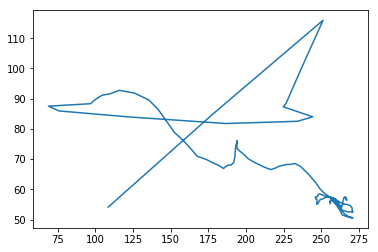

In [19]:
import matplotlib.pyplot as plt

x = []
y = []

for i in range(200):
    x.append(smoothed[i][10])
    y.append(smoothed[i][11])
plt.plot(x,y)

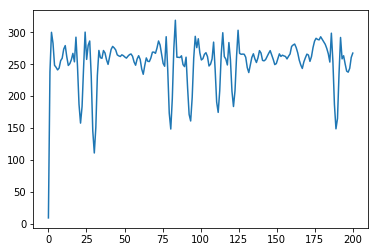

In [83]:
plt.plot(time, x)

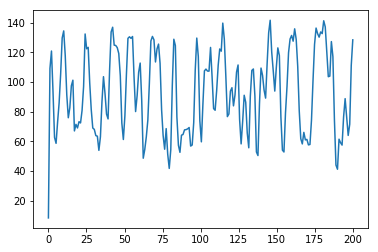

In [84]:
plt.plot(time, y)

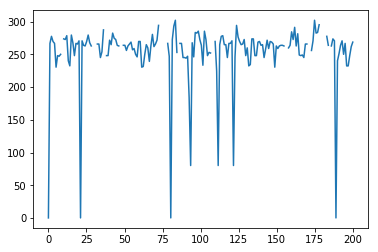

In [85]:
plt.plot(time,dict[5][0][:200])

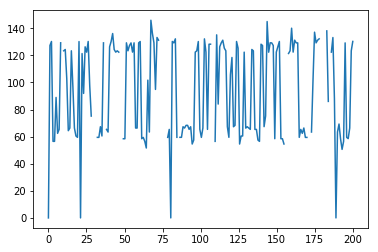

In [86]:
plt.plot(time,dict[5][1][:200])

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

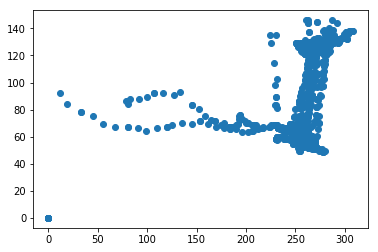

In [95]:
import matplotlib.pyplot as plt
plt.scatter(dict[5][0],dict[5][1])
plt

In [70]:
import glob
jsonCounter = len(glob.glob1(cwd,"*.json"))
jsonCounter
time = np.linspace(0, 200, num=200)
time

array([  0.        ,   1.00502513,   2.01005025,   3.01507538,
         4.0201005 ,   5.02512563,   6.03015075,   7.03517588,
         8.04020101,   9.04522613,  10.05025126,  11.05527638,
        12.06030151,  13.06532663,  14.07035176,  15.07537688,
        16.08040201,  17.08542714,  18.09045226,  19.09547739,
        20.10050251,  21.10552764,  22.11055276,  23.11557789,
        24.12060302,  25.12562814,  26.13065327,  27.13567839,
        28.14070352,  29.14572864,  30.15075377,  31.15577889,
        32.16080402,  33.16582915,  34.17085427,  35.1758794 ,
        36.18090452,  37.18592965,  38.19095477,  39.1959799 ,
        40.20100503,  41.20603015,  42.21105528,  43.2160804 ,
        44.22110553,  45.22613065,  46.23115578,  47.2361809 ,
        48.24120603,  49.24623116,  50.25125628,  51.25628141,
        52.26130653,  53.26633166,  54.27135678,  55.27638191,
        56.28140704,  57.28643216,  58.29145729,  59.29648241,
        60.30150754,  61.30653266,  62.31155779,  63.31

In [21]:
len(time)

250

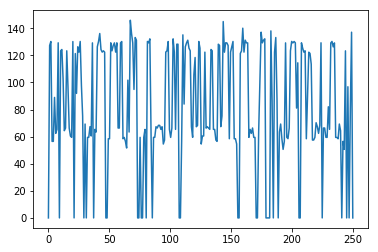

In [22]:
# time vs. y
plt.plot(time,dict[5][1][:250])

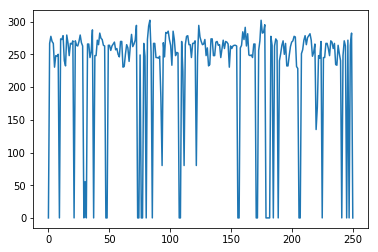

In [24]:
# time vs. x
plt.plot(time,dict[5][0][:250])

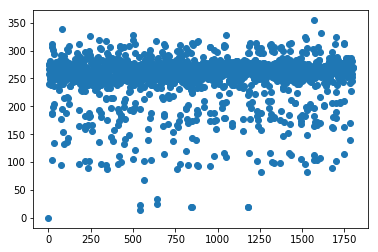

In [63]:
# Draw curve for every keypoint
from scipy import signal
x = signal.savgol_filter(dict[5][0],9,7)
y = signal.savgol_filter(dict[5][1],9,7)
plt.scatter(time, x)

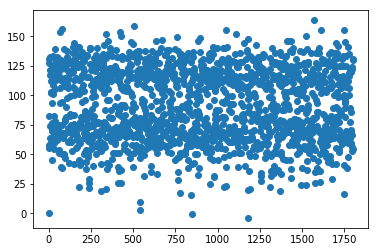

In [64]:
plt.scatter(time,y)

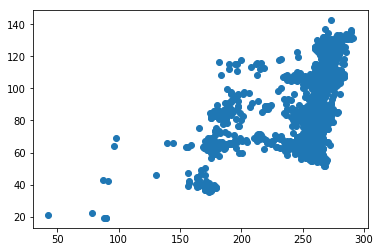

In [27]:
x = signal.savgol_filter(dict[5][0],3,1)
y = signal.savgol_filter(dict[5][1],3,1)
plt.scatter(x,y)

In [ ]:
# Store smoothed keypoints in smoothed
# smoothed = {0: [[], []], 2: [[], []], 3: [[],[]]..., 24:[[],[]]} 
# Each number is a keypoint
# In the array, the first array represents x-coordinates, the second array represents y-coordinates
# 2d keypoints for one frame, say frame #5: for keypoint in smoothed: frame.append(keypoint[0][5]), frame.append(keypoint[1][5])

